Importing COVID-19 data

In [314]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

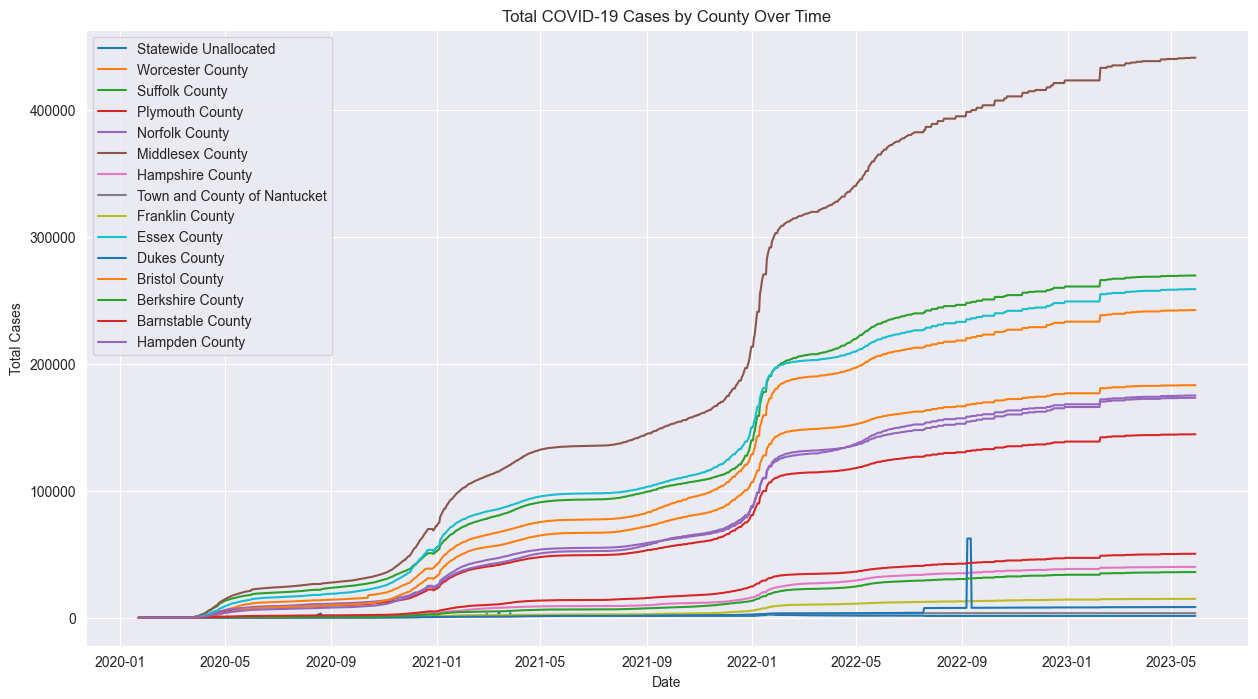

In [315]:
# Read the CSV file
df = pd.read_csv('Covid_data_by_date.csv')

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort the dataframe by 'date'
df = df.sort_values('date')

# Plot the total cases by county
plt.figure(figsize=(15,8))
for county in df['County Name'].unique():
    county_data = df[df['County Name'] == county]
    plt.plot(county_data['date'], county_data['cases'], label=county)
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases by County Over Time')
plt.legend()
plt.show()

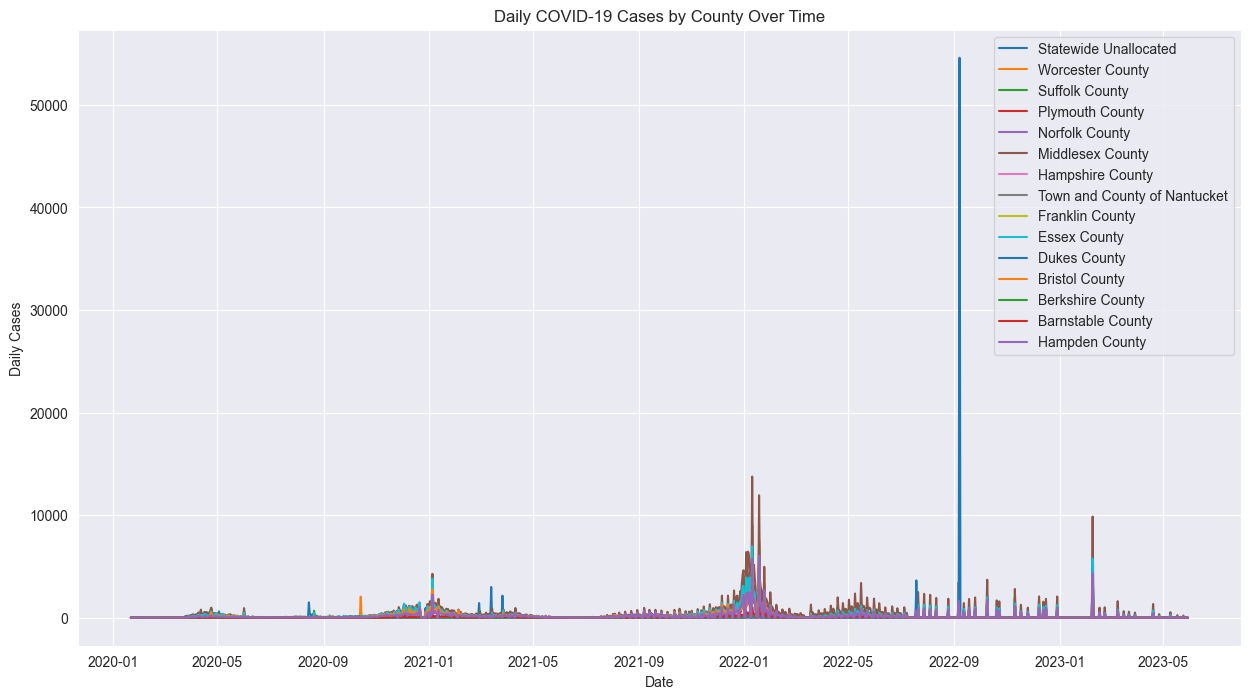

In [316]:
# Step 5: Calculate and plot daily cases by county
plt.figure(figsize=(15,8))
for county in df['County Name'].unique():
    county_data = df[df['County Name'] == county]
    county_data = county_data.set_index('date')
    # Compute daily cases
    daily_cases = county_data['cases'].diff().fillna(0)
    # If there are negative case numbers, set them to 0
    daily_cases = np.where(daily_cases<0, 0, daily_cases)
    plt.plot(county_data.index, daily_cases, label=county)
plt.xlabel('Date')
plt.ylabel('Daily Cases')
plt.title('Daily COVID-19 Cases by County Over Time')
plt.legend()
plt.show()

In [317]:
# Group the data by 'County Name' and calculate the total number of cases for each county
total_cases = df.groupby('County Name')['cases'].max()

# Convert the series to a dataframe
total_cases = total_cases.reset_index()

# Print the table
print(total_cases)

                     County Name   cases
0             Barnstable County    50392
1              Berkshire County    35985
2                Bristol County   183205
3                  Dukes County    62400
4                  Essex County   258893
5               Franklin County    14869
6                Hampden County   173291
7              Hampshire County    40052
8              Middlesex County   441205
9                Norfolk County   175101
10              Plymouth County   144525
11         Statewide Unallocated    4444
12               Suffolk County   269638
13  Town and County of Nantucket    3606
14             Worcester County   242360


The data provided clearly shows an abnormal spike in the number of cases for Dukes County from 9/7/2022 to 9/11/2022. This spike is unlikely to represent a real-world event, given that the number of cases jumps to 62400 and then returns to a level consistent with the trend before and after these dates.

Given this, it would be reasonable to treat these data points as anomalies. A suitable approach in this case would be to replace these values with interpolated values that maintain the trend of the surrounding data.

In [318]:
import pandas as pd
import glob

# Load the data
covid_df = pd.read_csv('Covid_data_by_date_corrected.csv')

# Convert the 'date' column to datetime format
covid_df['date'] = pd.to_datetime(covid_df['date'])

# Sort the dataframe by 'County Name' and 'date'
covid_df = covid_df.sort_values(['County Name', 'date'])

# Calculate the number of new cases per day
covid_df['cases'] = covid_df.groupby('County Name')['cases'].diff().fillna(0)

# Convert negative values (which can occur due to data corrections) to 0
covid_df['cases'] = covid_df['cases'].clip(lower=0)

covid_df


countyFIPS         County Name State  StateFIPS       date  cases
1           25001  Barnstable County     MA         25 2020-01-22    0.0
16          25001  Barnstable County     MA         25 2020-01-23    0.0
31          25001  Barnstable County     MA         25 2020-01-24    0.0
46          25001  Barnstable County     MA         25 2020-01-25    0.0
61          25001  Barnstable County     MA         25 2020-01-26    0.0
...           ...                 ...   ...        ...        ...    ...
18284       25027   Worcester County     MA         25 2023-05-25    0.0
18299       25027   Worcester County     MA         25 2023-05-26    0.0
18314       25027   Worcester County     MA         25 2023-05-27    0.0
18329       25027   Worcester County     MA         25 2023-05-28    0.0
18344       25027   Worcester County     MA         25 2023-05-29    0.0

[18345 rows x 6 columns]

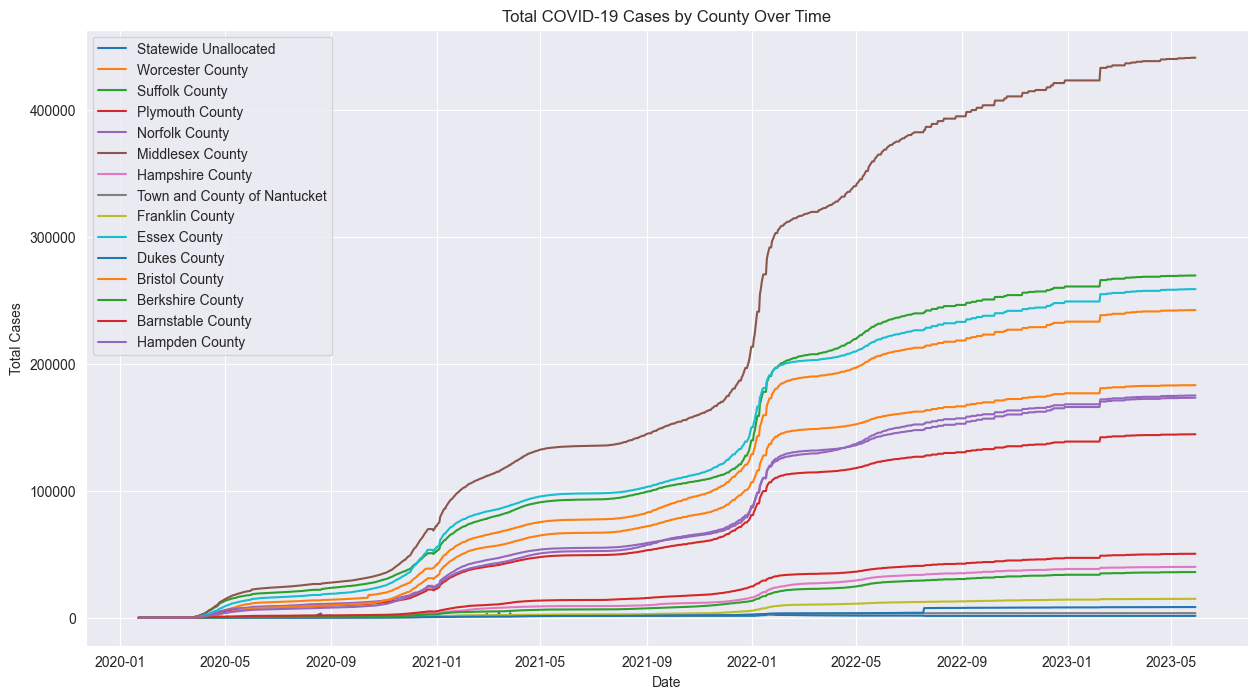

In [319]:
# Read the CSV file
df = pd.read_csv('Covid_data_by_date_corrected.csv')

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort the dataframe by 'date'
df = df.sort_values('date')

# Plot the total cases by county
plt.figure(figsize=(15,8))
for county in df['County Name'].unique():
    county_data = df[df['County Name'] == county]
    plt.plot(county_data['date'], county_data['cases'], label=county)
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases by County Over Time')
plt.legend()
plt.show()

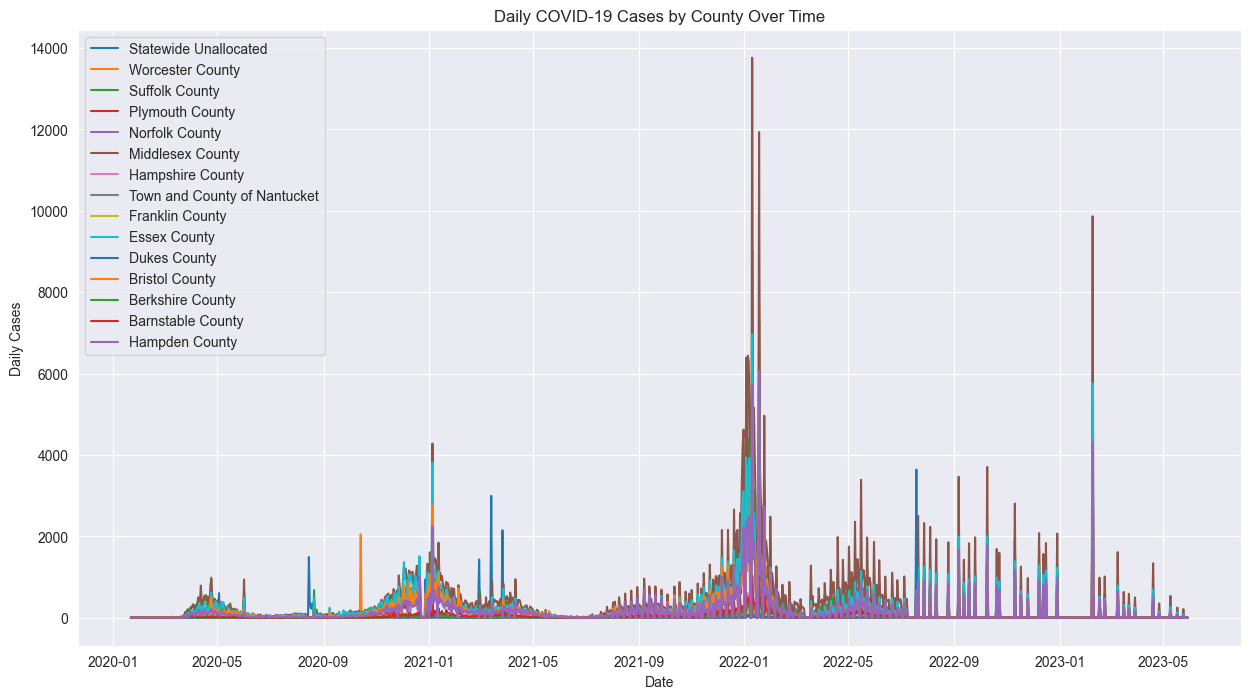

In [320]:
# Step 5: Calculate and plot daily cases by county
plt.figure(figsize=(15,8))
for county in df['County Name'].unique():
    county_data = df[df['County Name'] == county]
    county_data = county_data.set_index('date')
    # Compute daily cases
    daily_cases = county_data['cases'].diff().fillna(0)
    # If there are negative case numbers, set them to 0
    daily_cases = np.where(daily_cases<0, 0, daily_cases)
    plt.plot(county_data.index, daily_cases, label=county)
plt.xlabel('Date')
plt.ylabel('Daily Cases')
plt.title('Daily COVID-19 Cases by County Over Time')
plt.legend()
plt.show()

Getting the Social Distance Index data

In [321]:
# List of all counties in Massachusetts
ma_counties = ["Barnstable County", "Berkshire County", "Bristol County", "Dukes County", "Essex County", "Franklin County", "Hampden County", "Hampshire County", "Middlesex County", "Nantucket County", "Norfolk County", "Plymouth County", "Suffolk County", "Worcester County"]

# Load the SDI data
sdi_df = pd.read_csv('Social distancing index_county.csv')

# Filter the dataframe to include only the counties in Massachusetts
sdi_df = sdi_df[sdi_df['NAME'].isin(ma_counties)]

sdi_df


COUNTY               NAME  2020-01-01  2020-01-02  2020-01-03   
29      1059    Franklin County        48.0        30.0        10.0  \
134     5047    Franklin County        50.0        22.0        15.0   
311     9007   Middlesex County        53.0        15.0        15.0   
337    12037    Franklin County        39.0        27.0        18.0   
445    13119    Franklin County        45.0        23.0        25.0   
571    16041    Franklin County        51.0        23.0        13.0   
622    17055    Franklin County        41.0        24.0        16.0   
720    18047    Franklin County        40.0        15.0        13.0   
823    19069    Franklin County        45.0        16.0        15.0   
863    19149    Plymouth County        51.0        17.0        13.0   
917    20059    Franklin County        47.0        18.0        16.0   
1029   21073    Franklin County        50.0        24.0        21.0   
1180   23007    Franklin County        44.0        19.0        16.0   
1215   24047   Worcester County        45.0        17.0        15.0   
1217   25001  Barnstable County        50.0        18.0        16.0   
1218   25003   Berkshire County        44.0        17.0        16.0   
1219   25005     Bristol County        56.0        14.0        13.0   
1220   25007       Dukes County        38.0        18.0        19.0   
1221   25009       Essex County        55.0        17.0        17.0   
1222   25011    Franklin County        48.0        17.0        15.0   
1223   25013     Hampden County        56.0        16.0        15.0   
1224   25015   Hampshire County        51.0        18.0        15.0   
1225   25017   Middlesex County        51.0        18.0        17.0   
1226   25019   Nantucket County        48.0        30.0        33.0   
1227   25021     Norfolk County        52.0        20.0        18.0   
1228   25023    Plymouth County        56.0        17.0        15.0   
1229   25025     Suffolk County        52.0        23.0        21.0   
1230   25027   Worcester County        56.0        14.0        14.0   
1419   28037    Franklin County        41.0        28.0        13.0   
1518   29071    Franklin County        49.0        16.0        13.0   
1684   31061    Franklin County        50.0        12.0        13.0   
1780   34013       Essex County        61.0        22.0        18.0   
1785   34023   Middlesex County        59.0        17.0        17.0   
1843   36031       Essex County        43.0        17.0        15.0   
1844   36033    Franklin County        49.0        17.0        15.0   
1879   36103     Suffolk County        59.0        19.0        19.0   
1924   37069    Franklin County        50.0        22.0        15.0   
2067   39049    Franklin County        57.0        21.0        17.0   
2271   42055    Franklin County        54.0        19.0        14.0   
2311   44001     Bristol County        51.0        19.0        14.0   
2453   47051    Franklin County        45.0        27.0        20.0   
2602   48159    Franklin County        46.0        20.0        16.0   
2810   50009       Essex County        50.0        12.0        19.0   
2811   50011    Franklin County        58.0        17.0        15.0   
2847   51057       Essex County        44.0        12.0        14.0   
2852   51067    Franklin County        45.0        15.0        18.0   
2878   51119   Middlesex County        44.0        19.0        12.0   
2964   53021    Franklin County        55.0        25.0        20.0   
3006   54027   Hampshire County        57.0        17.0        22.0   

      2020-01-04  2020-01-05  2020-01-06  2020-01-07  2020-01-08  ...   
29          20.0        39.0        15.0        18.0        10.0  ...  \
134         28.0        33.0        17.0        17.0        10.0  ...   
311         33.0        47.0        18.0        17.0        16.0  ...   
337         25.0        33.0        22.0        19.0        15.0  ...   
445         25.0        39.0        17.0        10.0        11.0  ...   
571         28.0 

Reshaping the SDI data frame

In [322]:
sdi_df_long = sdi_df.melt(id_vars=['COUNTY', 'NAME'], var_name='date', value_name='SDI')
sdi_df_long['date'] = pd.to_datetime(sdi_df_long['date'])

In [323]:
sdi_df_long

COUNTY              NAME       date   SDI
0        1059   Franklin County 2020-01-01  48.0
1        5047   Franklin County 2020-01-01  50.0
2        9007  Middlesex County 2020-01-01  53.0
3       12037   Franklin County 2020-01-01  39.0
4       13119   Franklin County 2020-01-01  45.0
...       ...               ...        ...   ...
23319   51057      Essex County 2021-04-20   7.0
23320   51067   Franklin County 2021-04-20  13.0
23321   51119  Middlesex County 2021-04-20  14.0
23322   53021   Franklin County 2021-04-20  16.0
23323   54027  Hampshire County 2021-04-20  19.0

[23324 rows x 4 columns]

In [324]:
print(covid_df.columns)
print(sdi_df.columns)

Index(['countyFIPS', 'County Name', 'State', 'StateFIPS', 'date', 'cases'], dtype='object')
Index(['COUNTY', 'NAME', '2020-01-01', '2020-01-02', '2020-01-03',
       '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
       ...
       '2021-04-11', '2021-04-12', '2021-04-13', '2021-04-14', '2021-04-15',
       '2021-04-16', '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20'],
      dtype='object', length=478)


In [325]:
# Merge the two dataframes on county and date
merged_df = pd.merge(covid_df, sdi_df_long, left_on=['countyFIPS', 'date'], right_on=['COUNTY', 'date'])

In [326]:
merged_df

countyFIPS         County Name State  StateFIPS       date  cases   
0          25001  Barnstable County     MA         25 2020-01-22    0.0  \
1          25001  Barnstable County     MA         25 2020-01-23    0.0   
2          25001  Barnstable County     MA         25 2020-01-24    0.0   
3          25001  Barnstable County     MA         25 2020-01-25    0.0   
4          25001  Barnstable County     MA         25 2020-01-26    0.0   
...          ...                 ...   ...        ...        ...    ...   
6365       25027   Worcester County     MA         25 2021-04-16  200.0   
6366       25027   Worcester County     MA         25 2021-04-17  169.0   
6367       25027   Worcester County     MA         25 2021-04-18  122.0   
6368       25027   Worcester County     MA         25 2021-04-19   93.0   
6369       25027   Worcester County     MA         25 2021-04-20  137.0   

      COUNTY               NAME   SDI  
0      25001  Barnstable County  19.0  
1      25001  Barnstable County  16.0  
2      25001  Barnstable County  16.0  
3      25001  Barnstable County  30.0  
4      25001  Barnstable County  38.0  
...      ...                ...   ...  
6365   25027   Worcester County  21.0  
6366   25027   Worcester County  23.0  
6367   25027   Worcester County  24.0  
6368   25027   Worcester County  20.0  
6369   25027   Worcester County  19.0  

[6370 rows x 9 columns]

In [327]:
# Pearson's correlation
pearson_corr = merged_df['cases'].corr(merged_df['SDI'], method='pearson')
print(f"Pearson's correlation: {pearson_corr}")

# Spearman's correlation
spearman_corr = merged_df['cases'].corr(merged_df['SDI'], method='spearman')
print(f"Spearman's correlation: {spearman_corr}")

# Kendall's Tau
kendall_corr = merged_df['cases'].corr(merged_df['SDI'], method='kendall')
print(f"Kendall's Tau: {kendall_corr}")


Pearson's correlation: 0.15043615495020535
Spearman's correlation: 0.27443716884871827
Kendall's Tau: 0.19412732528597354


In [328]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

Pearson correlation: 0.150


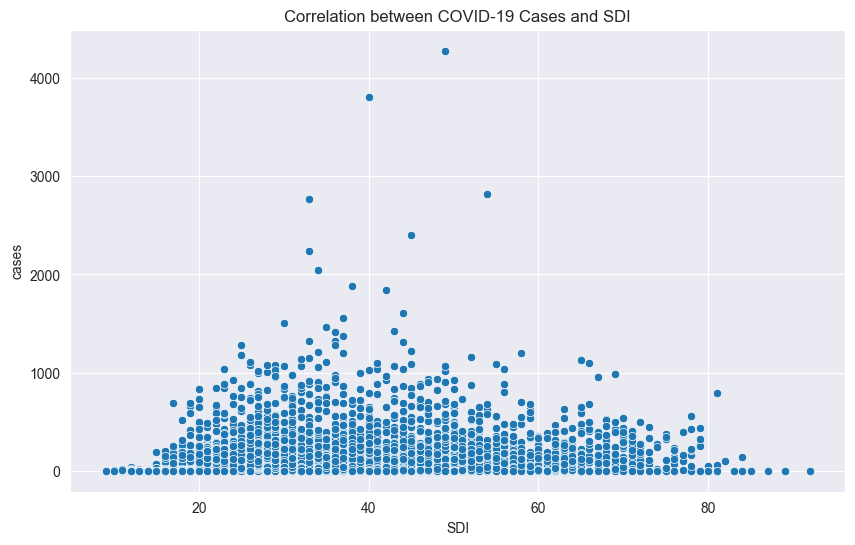

In [329]:
# Calculate the correlation
correlation, _ = pearsonr(merged_df['cases'], merged_df['SDI'])
print('Pearson correlation: %.3f' % correlation)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, y='cases', x='SDI')
plt.title('Correlation between COVID-19 Cases and SDI')
plt.show()

In [330]:
import scipy
from scipy.stats import pearsonr, spearmanr, kendalltau

# Calculate the Pearson's correlation
pearson_corr, _ = scipy.stats.pearsonr(merged_df['cases'], merged_df['SDI'])
print('Pearson correlation: %.3f' % pearson_corr)

# Calculate the Spearman's correlation
spearman_corr, _ = scipy.stats.spearmanr(merged_df['cases'], merged_df['SDI'])
print('Spearman correlation: %.3f' % spearman_corr)

# Calculate the Kendall's correlation
kendall_corr, _ = scipy.stats.kendalltau(merged_df['cases'], merged_df['SDI'])
print('Kendall correlation: %.3f' % kendall_corr)


Pearson correlation: 0.150
Spearman correlation: 0.274
Kendall correlation: 0.194


Pearson correlation: 0.150 - This indicates a small, positive linear relationship between the two variables. This means as one variable increases, the other variable tends to slightly increase too, but it's a weak relationship.

Spearman correlation: 0.274 - This indicates a somewhat stronger, but still small to moderate, monotonic relationship. This means as one variable increases, the other variable also tends to increase. Unlike the Pearson correlation, this relationship doesn't have to be linear.

Kendall correlation: 0.194 - This also indicates a small, positive association between the ranks of your data. As with Spearman, as one variable increases, the other tends to increase, but this correlation is not as strong.

The discrepancy between the Pearson and the Spearman/Kendall correlations suggests that the relationship between the variables might not be perfectly linear. Spearman's and Kendall's correlations are more robust to outliers and non-linear relationships, which might explain their slightly higher values compared to Pearson's correlation.

Three types of correlation coefficients are presented here: Pearson, Spearman, and Kendall.

Pearson correlation assumes that both datasets are normally distributed and measures the linear relationship between two datasets.

Spearman correlation does not assume that both datasets are normally distributed and measures the monotonic relationship between two datasets.

Kendall correlation also does not assume that the datasets are normally distributed and measures the ordinal association between two datasets.

In [331]:
import scipy
from scipy.stats import pearsonr, spearmanr, kendalltau

# Get the unique county names
unique_counties = merged_df['County Name'].unique()

# Initialize a dictionary to store the results
correlation_results = {}

# Loop over the unique counties
for county in unique_counties:
    # Subset the dataframe for the current county
    county_df = merged_df[merged_df['County Name'] == county]

    # Calculate the Pearson's correlation
    pearson_corr, _ = scipy.stats.pearsonr(county_df['cases'], county_df['SDI'])

    # Calculate the Spearman's correlation
    spearman_corr, _ = scipy.stats.spearmanr(county_df['cases'], county_df['SDI'])

    # Calculate the Kendall's correlation
    kendall_corr, _ = scipy.stats.kendalltau(county_df['cases'], county_df['SDI'])

    # Store the results in the dictionary
    correlation_results[county] = {
        'Pearson': pearson_corr,
        'Spearman': spearman_corr,
        'Kendall': kendall_corr
    }

# Print the results
for county, correlations in correlation_results.items():
    print(f'{county}:')
    print(f"  Pearson correlation: {correlations['Pearson']:.3f}")
    print(f"  Spearman correlation: {correlations['Spearman']:.3f}")
    print(f"  Kendall correlation: {correlations['Kendall']:.3f}")


Barnstable County :
  Pearson correlation: -0.055
  Spearman correlation: 0.112
  Kendall correlation: 0.079
Berkshire County :
  Pearson correlation: 0.066
  Spearman correlation: 0.199
  Kendall correlation: 0.140
Bristol County :
  Pearson correlation: -0.006
  Spearman correlation: 0.143
  Kendall correlation: 0.095
Dukes County :
  Pearson correlation: -0.110
  Spearman correlation: -0.013
  Kendall correlation: -0.008
Essex County :
  Pearson correlation: 0.113
  Spearman correlation: 0.270
  Kendall correlation: 0.179
Franklin County :
  Pearson correlation: 0.131
  Spearman correlation: 0.215
  Kendall correlation: 0.156
Hampden County :
  Pearson correlation: 0.011
  Spearman correlation: 0.147
  Kendall correlation: 0.097
Hampshire County :
  Pearson correlation: -0.037
  Spearman correlation: 0.120
  Kendall correlation: 0.083
Middlesex County :
  Pearson correlation: 0.139
  Spearman correlation: 0.256
  Kendall correlation: 0.172
Norfolk County :
  Pearson correlation: 0.1

 Based on the information provided in the links, the following key dates related to the COVID-19 lockdown and reopening in Massachusetts are:

https://www.mass.gov/info-details/reopening-massachusetts

The lockdown started on March 24, 2020, when Governor Charlie Baker ordered all non-essential businesses to close [1].
    Phase 1 ("Start") of the reopening plan began on May 18, 2020, allowing certain businesses to reopen [2].
    Phase 2 ("Cautious") started in June 2020, allowing additional lower risk businesses to reopen [2].
    Phase 3 ("Vigilant") began on July 6, 2020, permitting a broad range of sectors to open [2].
    Phase 4 ("New Normal") began on March 22, 2021, with more industries reopening [2].
    All industries were permitted to open and most restrictions were lifted on May 29, 2021 [2].
    The state of emergency officially ended on June 15, 2021 [2].


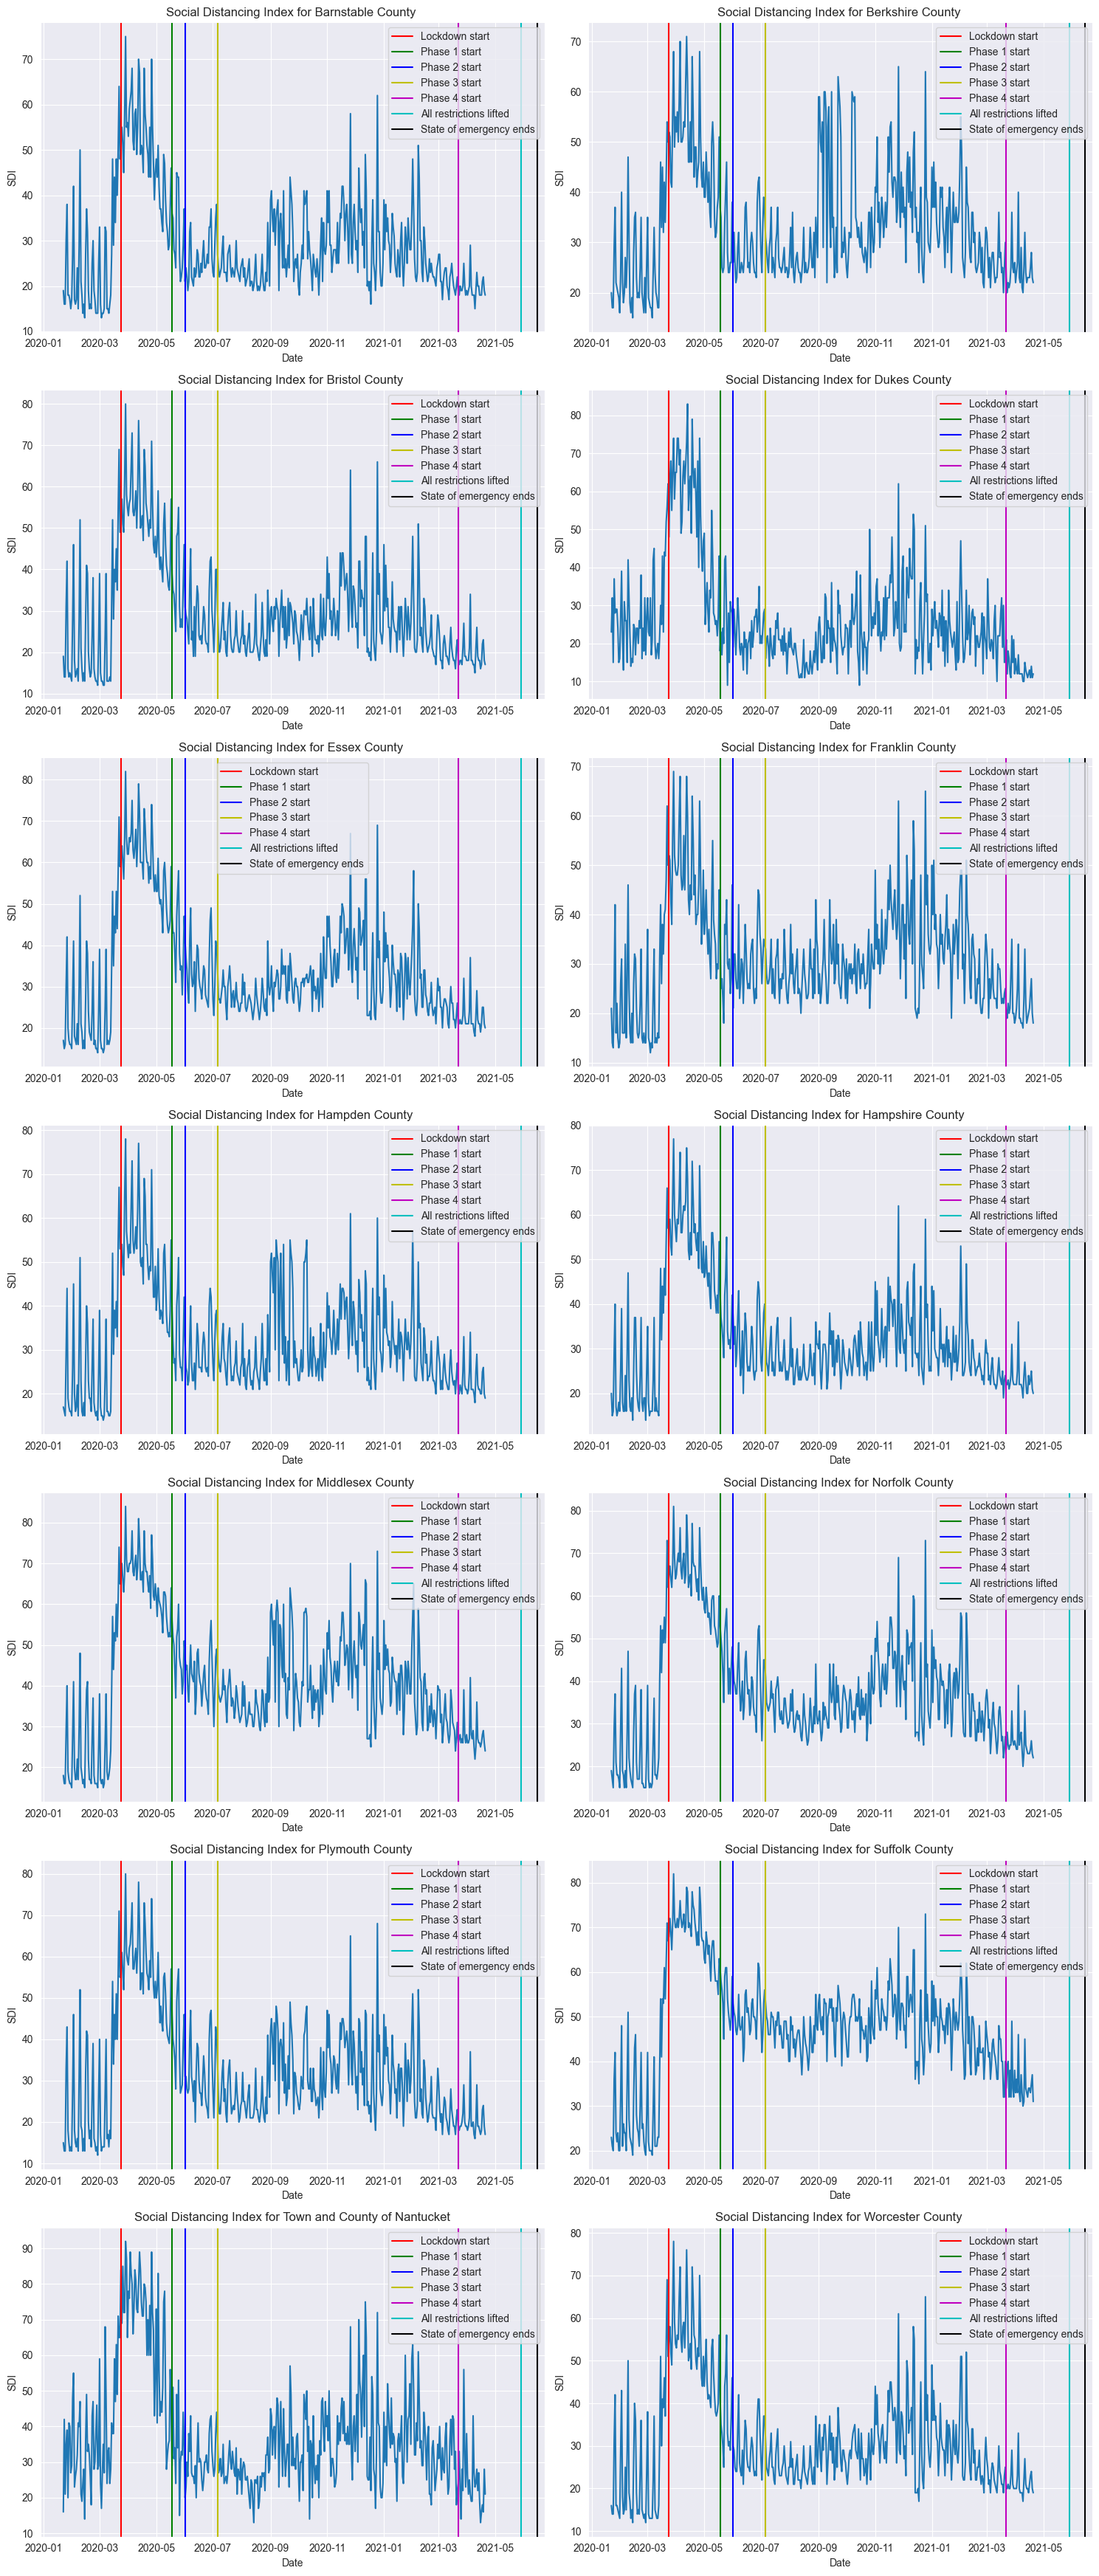

In [332]:
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Get the unique county names
unique_counties = merged_df['County Name'].unique()

# Define the key dates
dates = {
    'Lockdown start': datetime.datetime(2020, 3, 24),
    'Phase 1 start': datetime.datetime(2020, 5, 18),
    'Phase 2 start': datetime.datetime(2020, 6, 1),  # Exact date in June not specified
    'Phase 3 start': datetime.datetime(2020, 7, 6),
    'Phase 4 start': datetime.datetime(2021, 3, 22),
    'All restrictions lifted': datetime.datetime(2021, 5, 29),
    'State of emergency ends': datetime.datetime(2021, 6, 15),
}

# Define the colors for the lines
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k']

# Calculate the number of rows needed for subplots
num_rows = np.ceil(len(unique_counties) / 2)

# Create a figure for the subplots
fig, axs = plt.subplots(int(num_rows), 2, figsize=(15, num_rows * 5))

# Flatten the axes
axs = axs.ravel()

# Loop over the unique counties
for i, county in enumerate(unique_counties):
    # Subset the dataframe for the current county
    county_df = merged_df[merged_df['County Name'] == county]

    # Create a plot for the current county
    axs[i].plot(county_df['date'], county_df['SDI'])

    # Add vertical lines for the key dates
    for (label, date), color in zip(dates.items(), colors):
        axs[i].axvline(x=date, color=color, label=label)

    # Set the title and labels
    axs[i].set_title(f'Social Distancing Index for {county}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('SDI')

    # Add a legend
    axs[i].legend()

# Remove any unused subplots
if len(unique_counties) % 2 != 0:
    fig.delaxes(axs[-1])

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()

In [333]:
merged_df

countyFIPS         County Name State  StateFIPS       date  cases   
0          25001  Barnstable County     MA         25 2020-01-22    0.0  \
1          25001  Barnstable County     MA         25 2020-01-23    0.0   
2          25001  Barnstable County     MA         25 2020-01-24    0.0   
3          25001  Barnstable County     MA         25 2020-01-25    0.0   
4          25001  Barnstable County     MA         25 2020-01-26    0.0   
...          ...                 ...   ...        ...        ...    ...   
6365       25027   Worcester County     MA         25 2021-04-16  200.0   
6366       25027   Worcester County     MA         25 2021-04-17  169.0   
6367       25027   Worcester County     MA         25 2021-04-18  122.0   
6368       25027   Worcester County     MA         25 2021-04-19   93.0   
6369       25027   Worcester County     MA         25 2021-04-20  137.0   

      COUNTY               NAME   SDI  
0      25001  Barnstable County  19.0  
1      25001  Barnstable County  16.0  
2      25001  Barnstable County  16.0  
3      25001  Barnstable County  30.0  
4      25001  Barnstable County  38.0  
...      ...                ...   ...  
6365   25027   Worcester County  21.0  
6366   25027   Worcester County  23.0  
6367   25027   Worcester County  24.0  
6368   25027   Worcester County  20.0  
6369   25027   Worcester County  19.0  

[6370 rows x 9 columns]

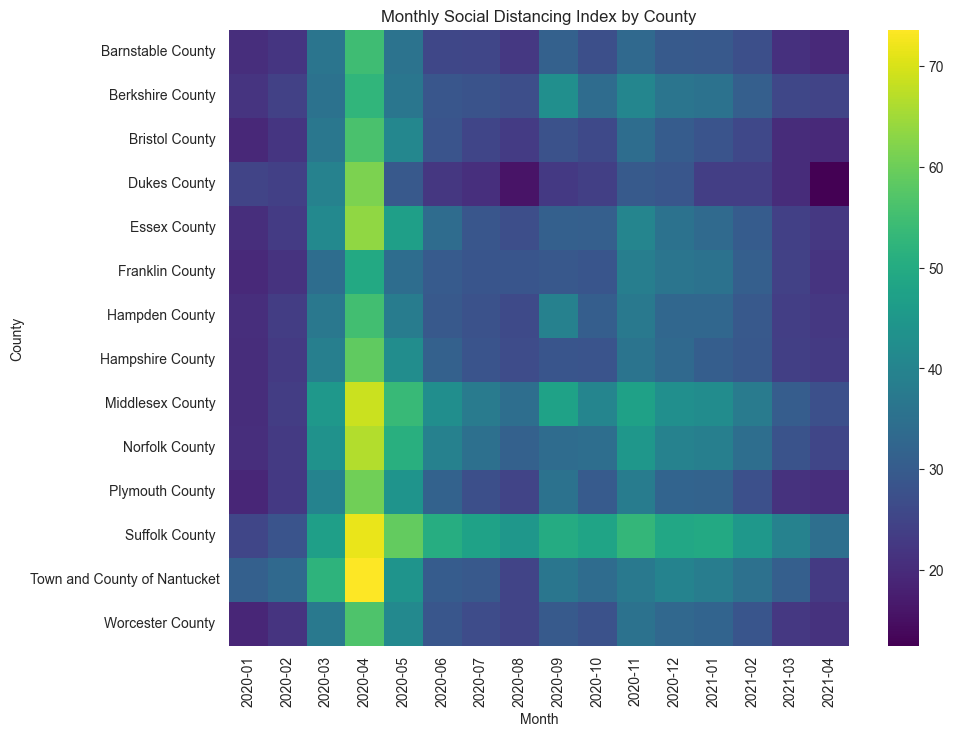

In [334]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Resample the dataframe to a monthly frequency for each county
merged_df['month'] = merged_df['date'].dt.to_period('M')
monthly_merged_df = merged_df.groupby(['County Name', 'month'])['SDI'].mean().reset_index()

# Pivot the data to get it in the right shape for a heatmap
heatmap_data = monthly_merged_df.pivot_table(index='County Name', columns='month', values='SDI')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Monthly Social Distancing Index by County')
plt.xlabel('Month')
plt.ylabel('County')
plt.show()


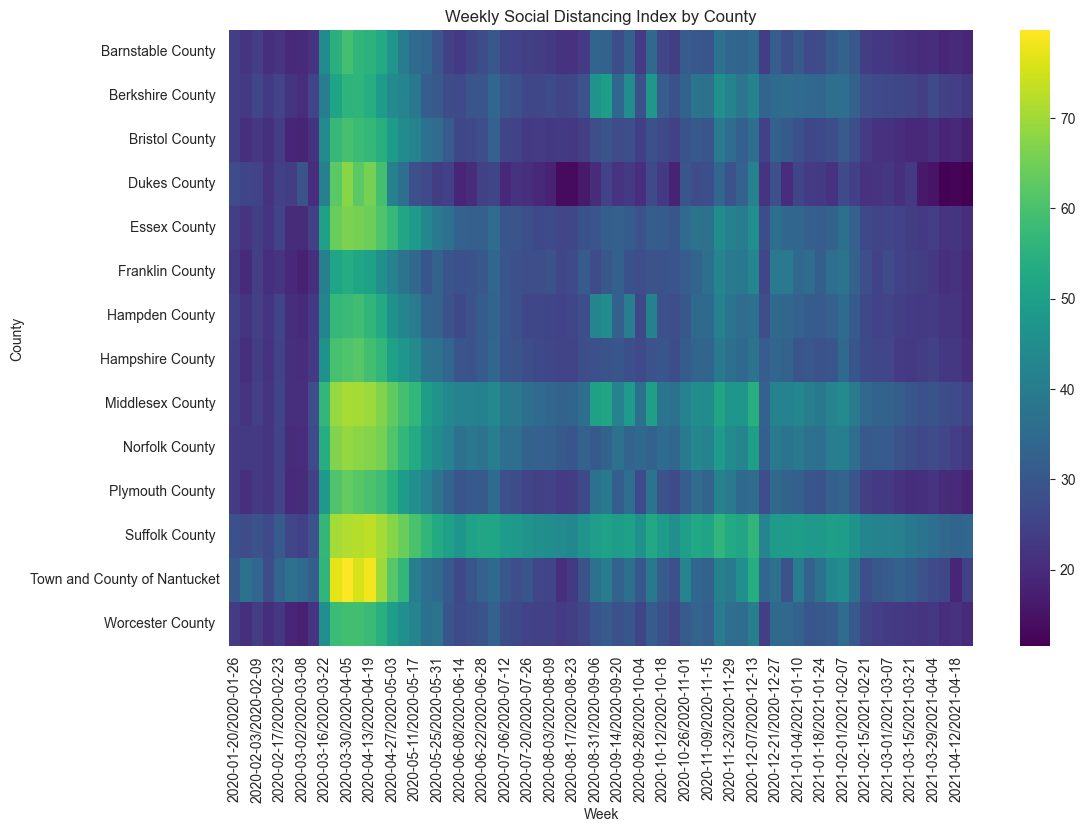

In [335]:
# Resample the dataframe to a weekly frequency for each county
merged_df['week'] = merged_df['date'].dt.to_period('W')
weekly_merged_df = merged_df.groupby(['County Name', 'week'])['SDI'].mean().reset_index()

# Pivot the data to get it in the right shape for a heatmap
heatmap_data = weekly_merged_df.pivot_table(index='County Name', columns='week', values='SDI')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Weekly Social Distancing Index by County')
plt.xlabel('Week')
plt.ylabel('County')

plt.show()

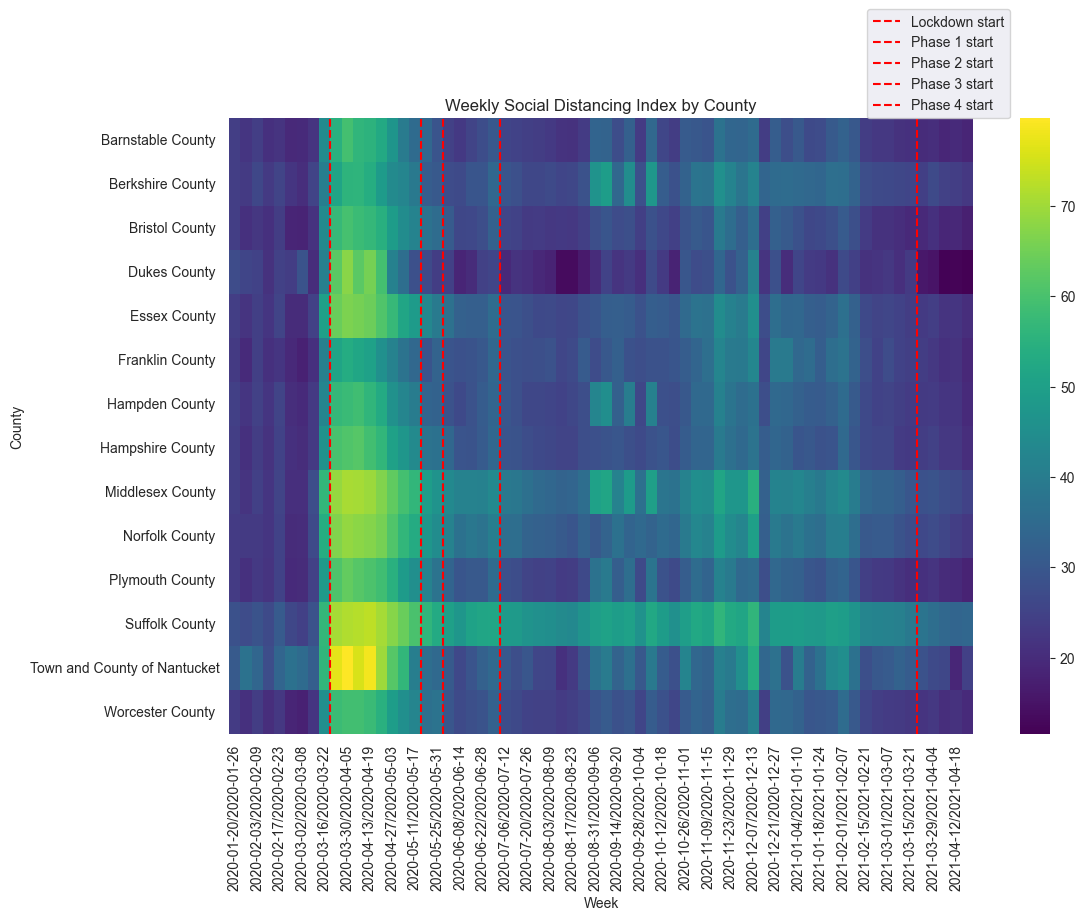

In [336]:
# Resample the dataframe to a weekly frequency for each county
merged_df['week'] = merged_df['date'].dt.to_period('W')
weekly_merged_df = merged_df.groupby(['County Name', 'week'])['SDI'].mean().reset_index()

# Pivot the data to get it in the right shape for a heatmap
heatmap_data = weekly_merged_df.pivot_table(index='County Name', columns='week', values='SDI')

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', ax=ax)

# Define the key dates
key_dates = {
    'Lockdown start': pd.to_datetime('2020-03-24'),
    'Phase 1 start': pd.to_datetime('2020-05-18'),
    'Phase 2 start': pd.to_datetime('2020-06-01'),
    'Phase 3 start': pd.to_datetime('2020-07-06'),
    'Phase 4 start': pd.to_datetime('2021-03-22'),
}

# Convert the week labels from the heatmap to datetime and get their start date only
heatmap_dates = [pd.to_datetime(w.start_time) for w in weekly_merged_df['week'].unique()]

# Loop over the key dates
for label, date in key_dates.items():
    # Find the closest date on the heatmap to the key date
    closest_date = min(heatmap_dates, key=lambda x: abs(x - date))

    # Find the position of this closest date on the x-axis of the heatmap
    pos = list(heatmap_dates).index(closest_date)

    # Draw a vertical line at this position
    ax.axvline(x=pos, color='r', label=label, linestyle='--')

ax.set_title('Weekly Social Distancing Index by County')
ax.set_xlabel('Week')
ax.set_ylabel('County')

# Add a legend
# bbox_to_anchor moves the legend outside the figure, loc=2 is for upper left
ax.legend(bbox_to_anchor=(1.05, 1), loc=4, borderaxespad=0.)

plt.show()

In [337]:
# Subset the dataframe to the key dates
key_date_data = weekly_merged_df[weekly_merged_df['week'].apply(lambda x: x.start_time in key_dates.values())]

# Print the SDI for each county on the key dates
for index, row in key_date_data.iterrows():
    print(f"County: {row['County Name']}")
    print(f"Date: {row['week'].start_time.strftime('%Y-%m-%d')}")
    print(f"SDI: {row['SDI']}")
    print("\n")

County: Barnstable County 
Date: 2020-05-18
SDI: 34.142857142857146


County: Barnstable County 
Date: 2020-06-01
SDI: 24.714285714285715


County: Barnstable County 
Date: 2020-07-06
SDI: 25.571428571428573


County: Barnstable County 
Date: 2021-03-22
SDI: 20.0


County: Berkshire County 
Date: 2020-05-18
SDI: 31.428571428571427


County: Berkshire County 
Date: 2020-06-01
SDI: 27.142857142857142


County: Berkshire County 
Date: 2020-07-06
SDI: 29.571428571428573


County: Berkshire County 
Date: 2021-03-22
SDI: 24.142857142857142


County: Bristol County 
Date: 2020-05-18
SDI: 37.142857142857146


County: Bristol County 
Date: 2020-06-01
SDI: 30.857142857142858


County: Bristol County 
Date: 2020-07-06
SDI: 25.571428571428573


County: Bristol County 
Date: 2021-03-22
SDI: 19.428571428571427


County: Dukes County 
Date: 2020-05-18
SDI: 26.714285714285715


County: Dukes County 
Date: 2020-06-01
SDI: 24.428571428571427


County: Dukes County 
Date: 2020-07-06
SDI: 19.4285714285714

In [338]:
county_df

countyFIPS        County Name State  StateFIPS       date  cases   
5915       25027  Worcester County     MA         25 2020-01-22    0.0  \
5916       25027  Worcester County     MA         25 2020-01-23    0.0   
5917       25027  Worcester County     MA         25 2020-01-24    0.0   
5918       25027  Worcester County     MA         25 2020-01-25    0.0   
5919       25027  Worcester County     MA         25 2020-01-26    0.0   
...          ...                ...   ...        ...        ...    ...   
6365       25027  Worcester County     MA         25 2021-04-16  200.0   
6366       25027  Worcester County     MA         25 2021-04-17  169.0   
6367       25027  Worcester County     MA         25 2021-04-18  122.0   
6368       25027  Worcester County     MA         25 2021-04-19   93.0   
6369       25027  Worcester County     MA         25 2021-04-20  137.0   

      COUNTY              NAME   SDI  
5915   25027  Worcester County  16.0  
5916   25027  Worcester County  14.0  
5917   25027  Worcester County  14.0  
5918   25027  Worcester County  31.0  
5919   25027  Worcester County  42.0  
...      ...               ...   ...  
6365   25027  Worcester County  21.0  
6366   25027  Worcester County  23.0  
6367   25027  Worcester County  24.0  
6368   25027  Worcester County  20.0  
6369   25027  Worcester County  19.0  

[455 rows x 9 columns]

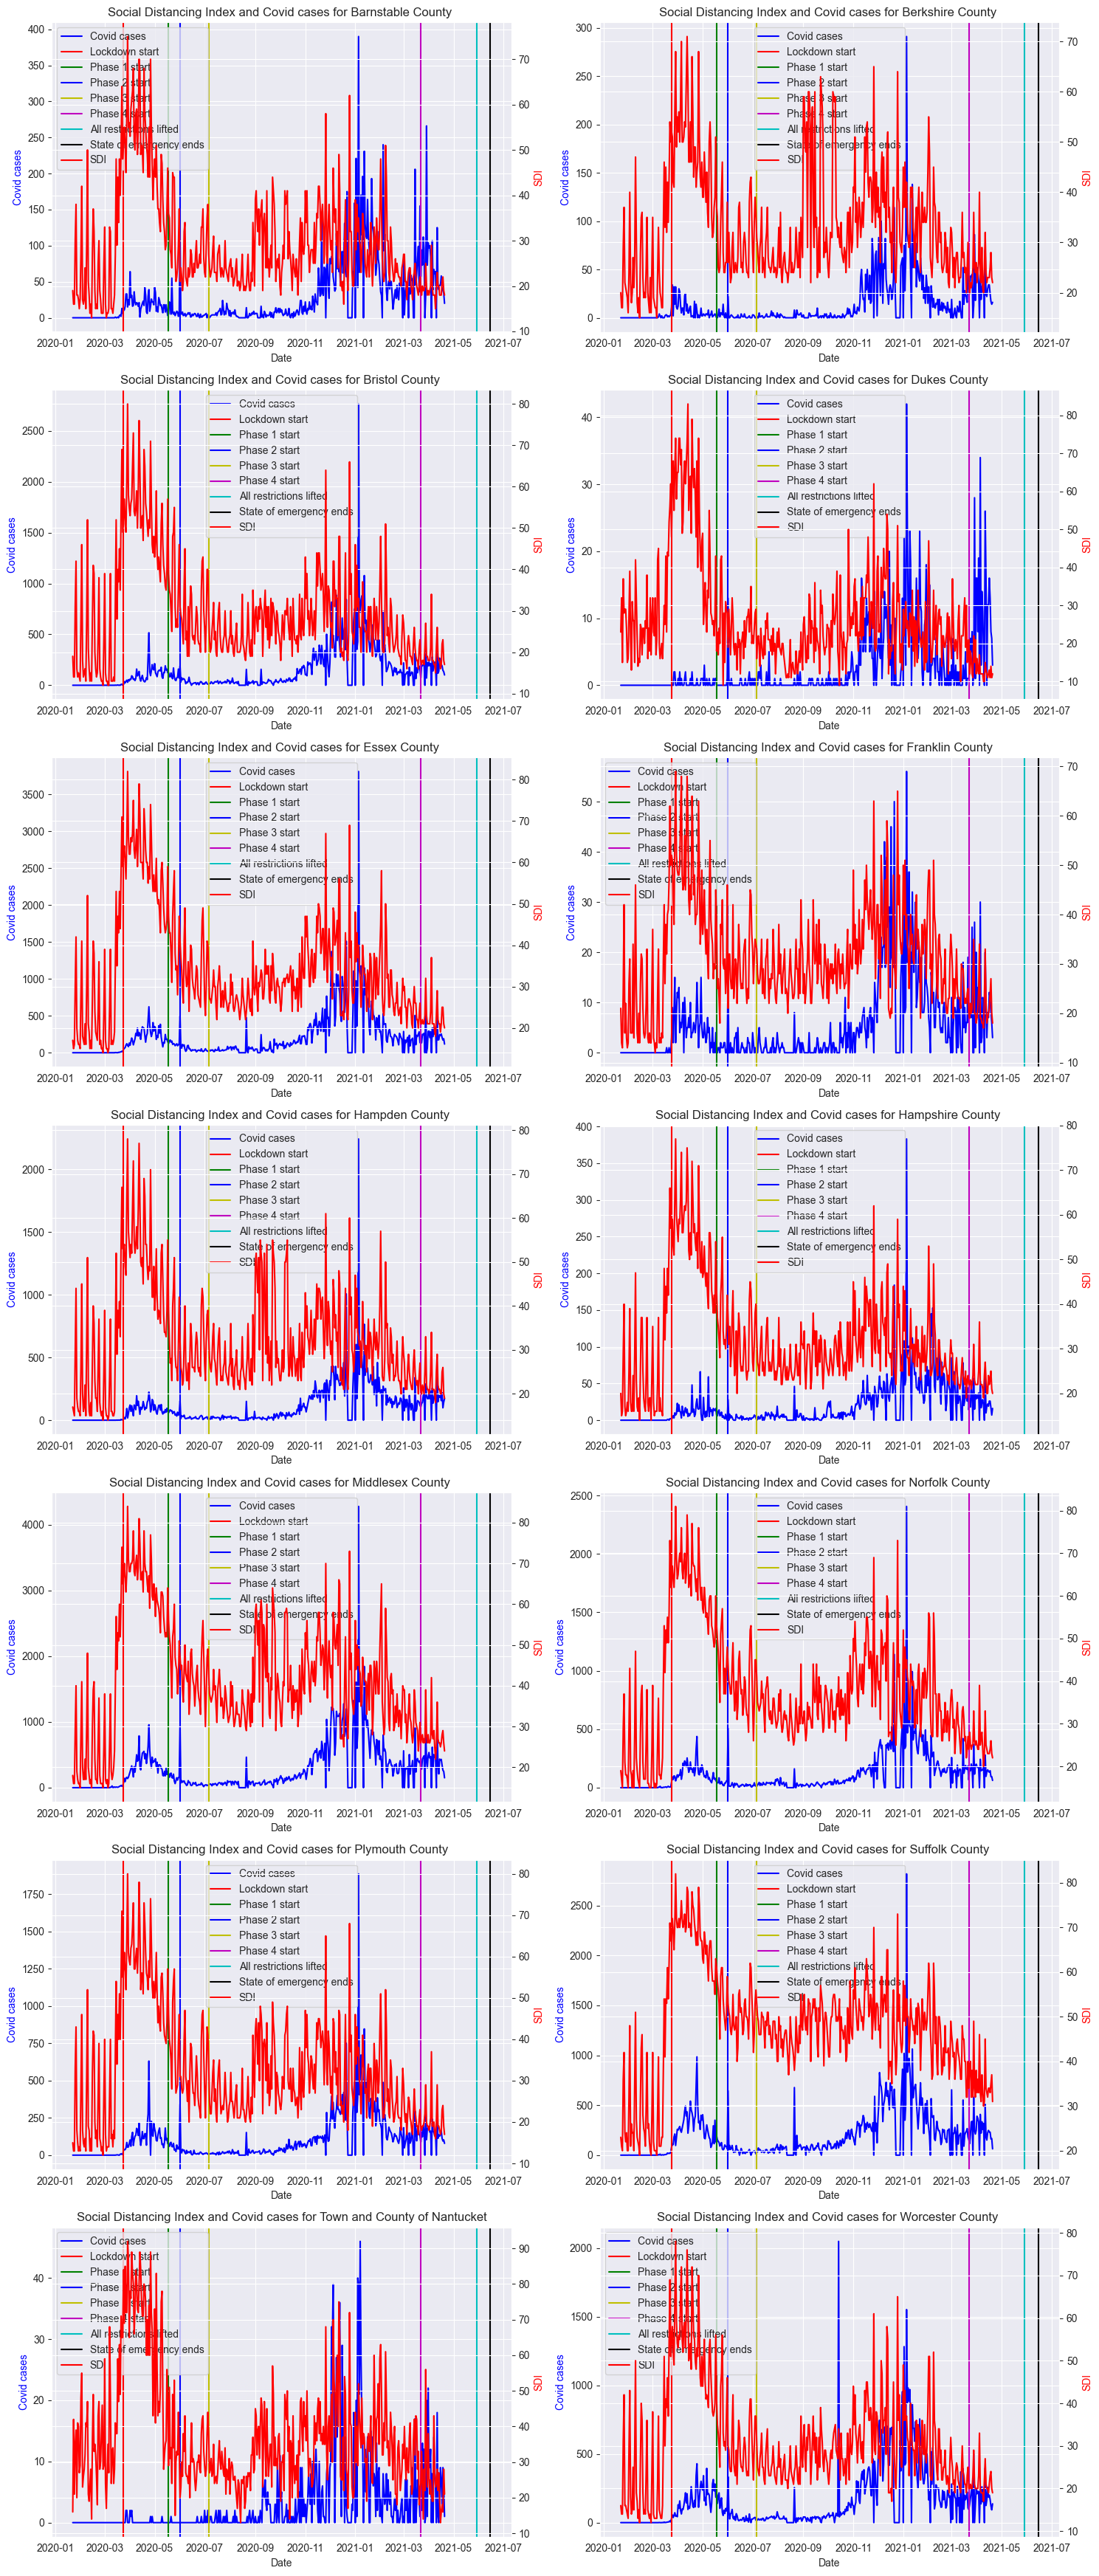

In [339]:
# Get the unique county names
unique_counties = merged_df['County Name'].unique()

# Define the key dates
dates = {
    'Lockdown start': datetime.datetime(2020, 3, 24),
    'Phase 1 start': datetime.datetime(2020, 5, 18),
    'Phase 2 start': datetime.datetime(2020, 6, 1),  # Exact date in June not specified
    'Phase 3 start': datetime.datetime(2020, 7, 6),
    'Phase 4 start': datetime.datetime(2021, 3, 22),
    'All restrictions lifted': datetime.datetime(2021, 5, 29),
    'State of emergency ends': datetime.datetime(2021, 6, 15),
}

# Define the colors for the lines
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k']

# Calculate the number of rows needed for subplots
num_rows = np.ceil(len(unique_counties) / 2)

# Create a figure for the subplots
fig, axs = plt.subplots(int(num_rows), 2, figsize=(15, num_rows * 5))

# Flatten the axes
axs = axs.ravel()

# Loop over the unique counties
for i, county in enumerate(unique_counties):
    # Subset the dataframe for the current county
    county_df = merged_df[merged_df['County Name'] == county]

    # Create a plot for the current county
    axs[i].plot(county_df['date'], county_df['cases'], color='b', label='Covid cases')

    # Add vertical lines for the key dates
    for (label, date), color in zip(dates.items(), colors):
        axs[i].axvline(x=date, color=color, label=label)

    # Create a second y-axis
    ax2 = axs[i].twinx()

    # Plot the SDI on the second y-axis
    ax2.plot(county_df['date'], county_df['SDI'], color='r', label='SDI')
    ax2.set_ylabel('SDI', color='r')

    # Set the title and labels
    axs[i].set_title(f'Social Distancing Index and Covid cases for {county}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Covid cases', color='b')

    # Add a legend
    lines, labels = axs[i].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    axs[i].legend(lines + lines2, labels + labels2, loc=0)

# Remove any unused subplots
if len(unique_counties) % 2 != 0:
    fig.delaxes(axs[-1])

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()

The above are plots for daily data

In [340]:
# To read all CSV files with AQI data into one dataframe
path = r'D:\DS Northeastern\DS 5110 Data Management and Processing\Project'
all_files = glob.glob(path + "/All Pollutants Daily AQI Values 2010 to 2023 - *.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    county = filename.split(" - ")[-1].replace(".csv", "") # extracting county name from file name
    df['County Name'] = county
    li.append(df)

aqi_df = pd.concat(li, axis=0, ignore_index=True)


In [341]:
aqi_df

Date   AQI Value Main Pollutant                Site Name   
0      01/02/2010          12          PM2.5  TRURO NATIONAL SEASHORE  \
1      01/05/2010          11          PM2.5  TRURO NATIONAL SEASHORE   
2      01/08/2010          11          PM2.5  TRURO NATIONAL SEASHORE   
3      01/11/2010          25          PM2.5  TRURO NATIONAL SEASHORE   
4      01/14/2010          13          PM2.5  TRURO NATIONAL SEASHORE   
...           ...         ...            ...                      ...   
56893  06/11/2023          46          Ozone                 UXBRIDGE   
56894  06/12/2023          58          Ozone                 UXBRIDGE   
56895  06/13/2023          45          Ozone                 UXBRIDGE   
56896  06/14/2023          54          Ozone                 UXBRIDGE   
56897  06/15/2023          40          Ozone                 UXBRIDGE   

           Site ID  Source        County Name  
0      25-001-0002     AQS  Barnstable County  
1      25-001-0002     AQS  Barnstable County  
2      25-001-0002     AQS  Barnstable County  
3      25-001-0002     AQS  Barnstable County  
4      25-001-0002     AQS  Barnstable County  
...            ...     ...                ...  
56893  25-027-0024  AirNow   Worcester County  
56894  25-027-0024  AirNow   Worcester County  
56895  25-027-0024  AirNow   Worcester County  
56896  25-027-0024  AirNow   Worcester County  
56897  25-027-0024  AirNow   Worcester County  

[56898 rows x 7 columns]

In [342]:
# Rename 'NAME' column in sdi_df_long to 'County Name' to match aqi_df
sdi_df_long.rename(columns={'NAME': 'County Name'}, inplace=True)

# Ensure 'County Name' in both dataframes are in the same format (title case)
aqi_df['County Name'] = aqi_df['County Name'].str.title()
sdi_df_long['County Name'] = sdi_df_long['County Name'].str.title()

aqi_df['Date'] = pd.to_datetime(aqi_df['Date'])

# Merge the dataframes
merged_df = pd.merge(aqi_df, sdi_df_long, how='inner', left_on=['Date', 'County Name'], right_on=['date', 'County Name'])

# Check the merged dataframe
print(merged_df.head())


        Date   AQI Value Main Pollutant                Site Name      Site ID   
0 2020-01-01          29          Ozone  TRURO NATIONAL SEASHORE  25-001-0002  \
1 2020-01-02          34          Ozone  TRURO NATIONAL SEASHORE  25-001-0002   
2 2020-01-03          31          Ozone  TRURO NATIONAL SEASHORE  25-001-0002   
3 2020-01-04          26          Ozone  TRURO NATIONAL SEASHORE  25-001-0002   
4 2020-01-05          35          Ozone  TRURO NATIONAL SEASHORE  25-001-0002   

  Source        County Name  COUNTY       date   SDI  
0    AQS  Barnstable County   25001 2020-01-01  50.0  
1    AQS  Barnstable County   25001 2020-01-02  18.0  
2    AQS  Barnstable County   25001 2020-01-03  16.0  
3    AQS  Barnstable County   25001 2020-01-04  36.0  
4    AQS  Barnstable County   25001 2020-01-05  44.0  


In [343]:
merged_df.drop('date', axis=1, inplace=True)

In [344]:
merged_df

Date   AQI Value Main Pollutant                Site Name   
0     2020-01-01          29          Ozone  TRURO NATIONAL SEASHORE  \
1     2020-01-02          34          Ozone  TRURO NATIONAL SEASHORE   
2     2020-01-03          31          Ozone  TRURO NATIONAL SEASHORE   
3     2020-01-04          26          Ozone  TRURO NATIONAL SEASHORE   
4     2020-01-05          35          Ozone  TRURO NATIONAL SEASHORE   
...          ...         ...            ...                      ...   
11389 2021-04-18          35          PM2.5  WORCESTER SUMMER STREET   
11390 2021-04-19          41          Ozone        WORCESTER AIRPORT   
11391 2021-04-19          41          Ozone        WORCESTER AIRPORT   
11392 2021-04-20          54          Ozone                 UXBRIDGE   
11393 2021-04-20          54          Ozone                 UXBRIDGE   

           Site ID Source        County Name  COUNTY   SDI  
0      25-001-0002    AQS  Barnstable County   25001  50.0  
1      25-001-0002    AQS  Barnstable County   25001  18.0  
2      25-001-0002    AQS  Barnstable County   25001  16.0  
3      25-001-0002    AQS  Barnstable County   25001  36.0  
4      25-001-0002    AQS  Barnstable County   25001  44.0  
...            ...    ...                ...     ...   ...  
11389  25-027-0023    AQS   Worcester County   25027  24.0  
11390  25-027-0015    AQS   Worcester County   24047  24.0  
11391  25-027-0015    AQS   Worcester County   25027  20.0  
11392  25-027-0024    AQS   Worcester County   24047  21.0  
11393  25-027-0024    AQS   Worcester County   25027  19.0  

[11394 rows x 9 columns]

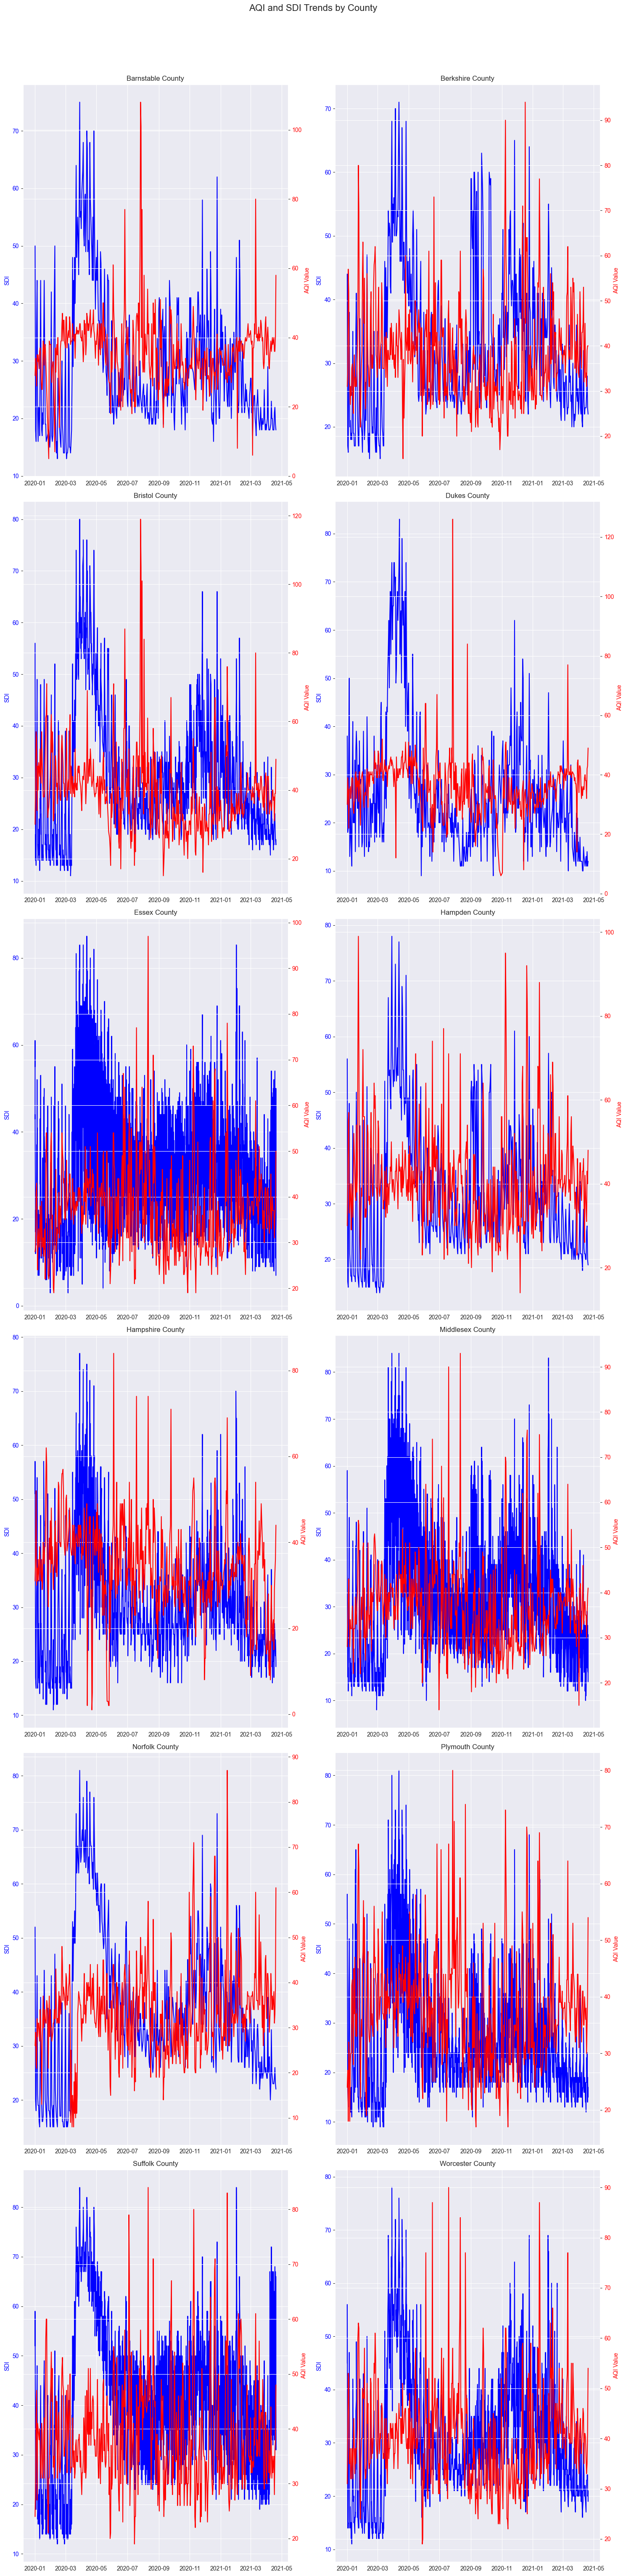

In [345]:
import matplotlib.pyplot as plt

# Get a list of unique counties
counties = merged_df['County Name'].unique()

# Create subplots with 2 columns
fig, axs = plt.subplots(len(counties) // 2 + len(counties) % 2, 2, figsize=(15, len(counties)*5))
axs = axs.flatten()

# Loop over each county and each subplot
for ax, county in zip(axs, counties):
    # Filter the data for the current county
    county_data = merged_df[merged_df['County Name'] == county]

    # Plot SDI on the left y-axis
    ax.plot(county_data['Date'], county_data['SDI'], color='b', label='SDI')
    ax.set_ylabel('SDI', color='b')
    ax.tick_params(axis='y', labelcolor='b')

    # Create a second y-axis for AQI
    ax2 = ax.twinx()

    # Plot AQI on the right y-axis
    ax2.plot(county_data['Date'], county_data[' AQI Value'], color='r', label=' AQI Value')
    ax2.set_ylabel('AQI Value', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Set the title for the subplot
    ax.set_title(county)

# Remove any unused subplots
for i in range(len(counties), len(axs)):
    fig.delaxes(axs[i])

# Add a title for the whole plot
fig.suptitle('AQI and SDI Trends by County', fontsize=16, y=1.02)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


In [346]:
merged_df

Date   AQI Value Main Pollutant                Site Name   
0     2020-01-01          29          Ozone  TRURO NATIONAL SEASHORE  \
1     2020-01-02          34          Ozone  TRURO NATIONAL SEASHORE   
2     2020-01-03          31          Ozone  TRURO NATIONAL SEASHORE   
3     2020-01-04          26          Ozone  TRURO NATIONAL SEASHORE   
4     2020-01-05          35          Ozone  TRURO NATIONAL SEASHORE   
...          ...         ...            ...                      ...   
11389 2021-04-18          35          PM2.5  WORCESTER SUMMER STREET   
11390 2021-04-19          41          Ozone        WORCESTER AIRPORT   
11391 2021-04-19          41          Ozone        WORCESTER AIRPORT   
11392 2021-04-20          54          Ozone                 UXBRIDGE   
11393 2021-04-20          54          Ozone                 UXBRIDGE   

           Site ID Source        County Name  COUNTY   SDI  
0      25-001-0002    AQS  Barnstable County   25001  50.0  
1      25-001-0002    AQS  Barnstable County   25001  18.0  
2      25-001-0002    AQS  Barnstable County   25001  16.0  
3      25-001-0002    AQS  Barnstable County   25001  36.0  
4      25-001-0002    AQS  Barnstable County   25001  44.0  
...            ...    ...                ...     ...   ...  
11389  25-027-0023    AQS   Worcester County   25027  24.0  
11390  25-027-0015    AQS   Worcester County   24047  24.0  
11391  25-027-0015    AQS   Worcester County   25027  20.0  
11392  25-027-0024    AQS   Worcester County   24047  21.0  
11393  25-027-0024    AQS   Worcester County   25027  19.0  

[11394 rows x 9 columns]

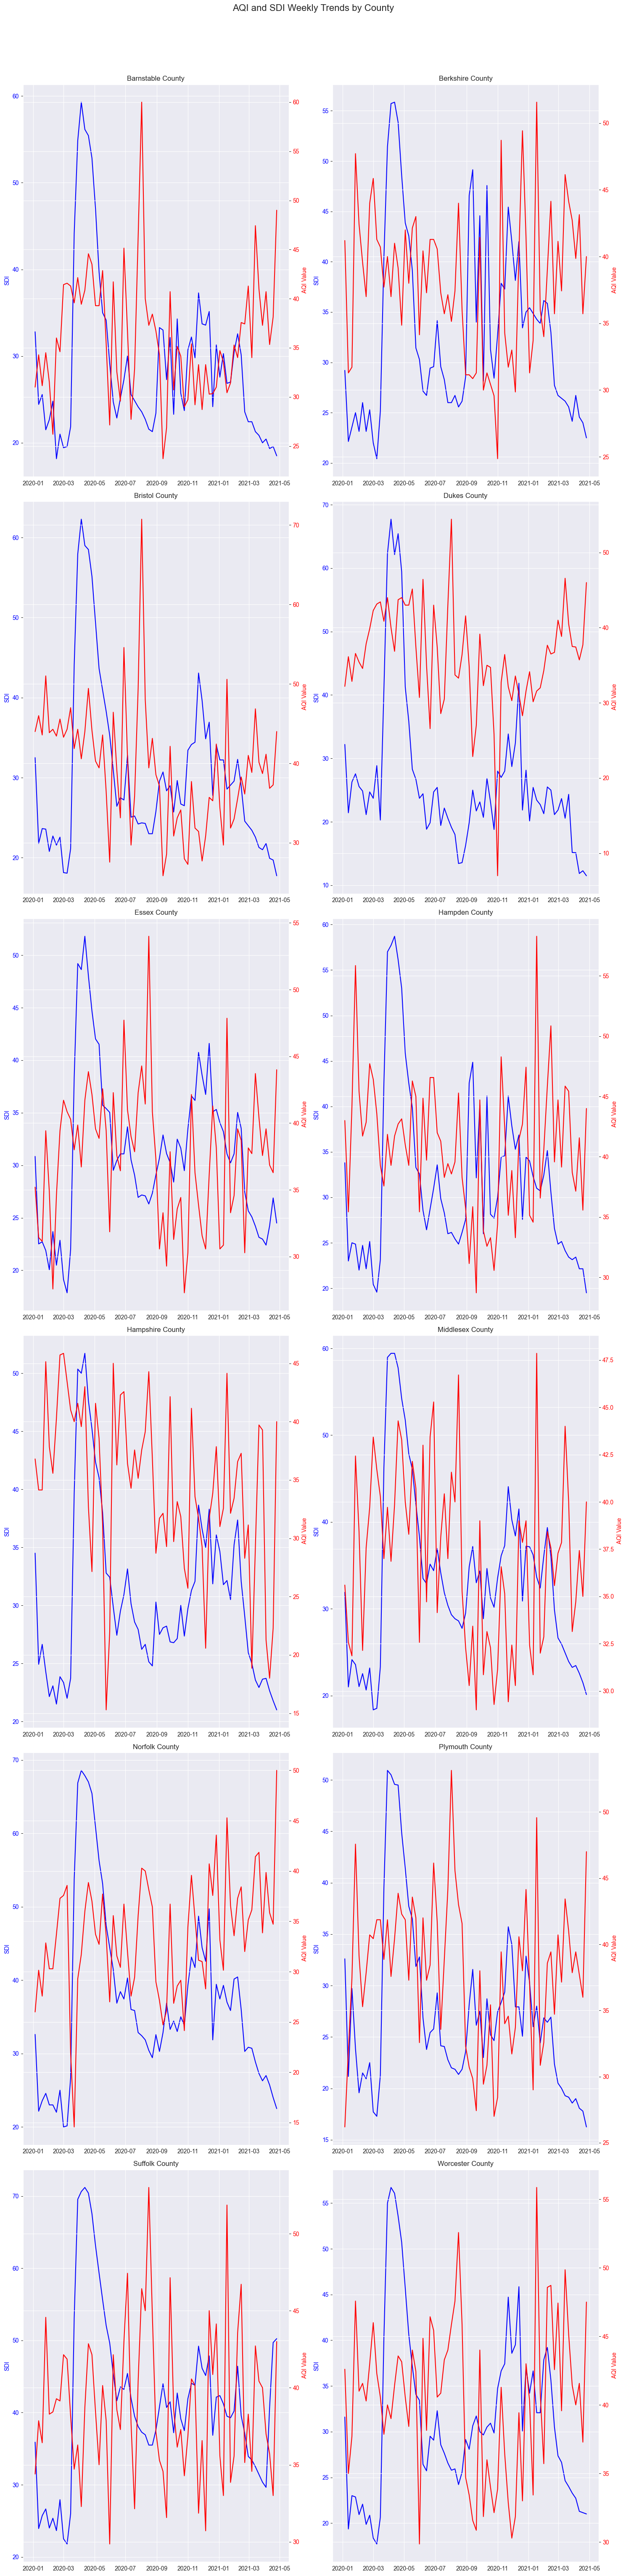

In [347]:
import matplotlib.pyplot as plt

# Ensure Date is in datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Get a list of unique counties
counties = merged_df['County Name'].unique()

# Create subplots with 2 columns
fig, axs = plt.subplots(len(counties) // 2 + len(counties) % 2, 2, figsize=(15, len(counties)*5))
axs = axs.flatten()

# Loop over each county and each subplot
for ax, county in zip(axs, counties):
    # Filter the data for the current county
    county_data = merged_df[merged_df['County Name'] == county]

    # Create weekly mean data for current county
    county_data.set_index('Date', inplace=True)
    county_data_weekly = county_data[['SDI', ' AQI Value']].resample('W').mean()

    # Plot SDI on the left y-axis
    ax.plot(county_data_weekly.index, county_data_weekly['SDI'], color='b', label='SDI')
    ax.set_ylabel('SDI', color='b')
    ax.tick_params(axis='y', labelcolor='b')

    # Create a second y-axis for AQI
    ax2 = ax.twinx()

    # Plot AQI on the right y-axis
    ax2.plot(county_data_weekly.index, county_data_weekly[' AQI Value'], color='r', label='AQI Value')
    ax2.set_ylabel(' AQI Value', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Set the title for the subplot
    ax.set_title(county)

# Remove any unused subplots
for i in range(len(counties), len(axs)):
    fig.delaxes(axs[i])

# Add a title for the whole plot
fig.suptitle('AQI and SDI Weekly Trends by County', fontsize=16, y=1.02)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [348]:
# Group the data by county
grouped = merged_df.groupby('County Name')

# For each county, calculate the correlation between AQI Value and SDI
for name, group in grouped:
    correlation = group[[' AQI Value', 'SDI']].corr().iloc[0, 1]
    print(f"Correlation for {name}: {correlation}")

Correlation for Barnstable County: 0.07100856009387596
Correlation for Berkshire County: -0.09377152779084443
Correlation for Bristol County: -0.04808202698876722
Correlation for Dukes County: 0.11040738830339737
Correlation for Essex County: 0.01304765531035191
Correlation for Hampden County: -0.029834686551033638
Correlation for Hampshire County: 0.014209671891012517
Correlation for Middlesex County: 0.032243297189603365
Correlation for Norfolk County: -0.04050785463581675
Correlation for Plymouth County: 0.019080910517870843
Correlation for Suffolk County: -0.07927171739181514
Correlation for Worcester County: -0.09956056484801729


In [349]:
# For each county, calculate the Spearman and Kendall Tau correlations between AQI Value and SDI
for name, group in grouped:
    spearman_corr = group[[' AQI Value', 'SDI']].corr(method='spearman').iloc[0, 1]
    kendall_corr = group[[' AQI Value', 'SDI']].corr(method='kendall').iloc[0, 1]
    print(f"Spearman correlation for {name}: {spearman_corr}")
    print(f"Kendall Tau correlation for {name}: {kendall_corr}")


Spearman correlation for Barnstable County: 0.03341289309502209
Kendall Tau correlation for Barnstable County: 0.026891787299956088
Spearman correlation for Berkshire County: -0.10571300185721003
Kendall Tau correlation for Berkshire County: -0.0732475473254328
Spearman correlation for Bristol County: -0.10437003900089856
Kendall Tau correlation for Bristol County: -0.06868499709026482
Spearman correlation for Dukes County: 0.11380601590855517
Kendall Tau correlation for Dukes County: 0.0771930645082247
Spearman correlation for Essex County: -0.0061217027091058866
Kendall Tau correlation for Essex County: -0.0030530294443322156
Spearman correlation for Hampden County: -0.023861830177388767
Kendall Tau correlation for Hampden County: -0.0170398885560387
Spearman correlation for Hampshire County: -0.004765429715236705
Kendall Tau correlation for Hampshire County: -0.000643608679179899
Spearman correlation for Middlesex County: 0.006440420947184513
Kendall Tau correlation for Middlesex Co

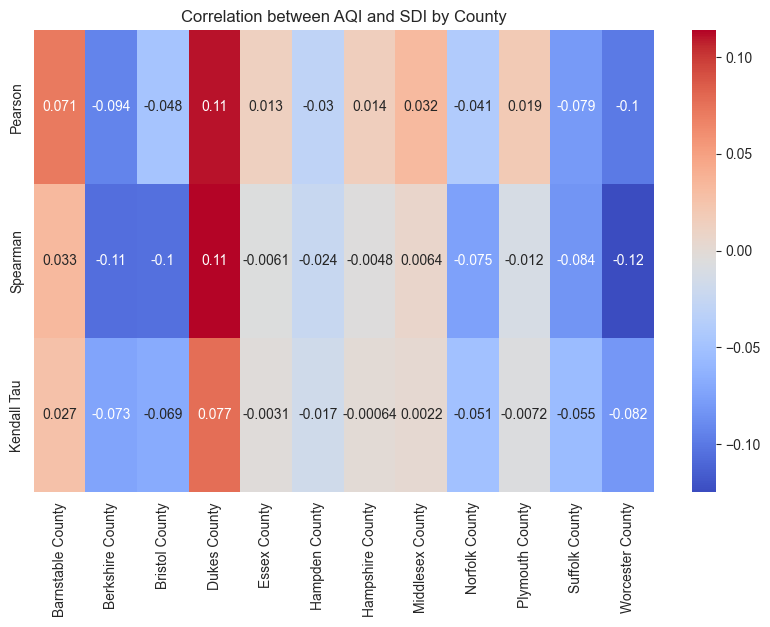

In [350]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for heatmap
heatmap_data = {}
for name, group in grouped:
    heatmap_data[name] = [group[[' AQI Value', 'SDI']].corr().iloc[0, 1],
                          group[[' AQI Value', 'SDI']].corr(method='spearman').iloc[0, 1],
                          group[[' AQI Value', 'SDI']].corr(method='kendall').iloc[0, 1]]

heatmap_df = pd.DataFrame(heatmap_data, index=['Pearson', 'Spearman', 'Kendall Tau'])

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, cmap='coolwarm')
plt.title('Correlation between AQI and SDI by County')
plt.show()

Trying to understand the long term variations in AQI

In [351]:
# To read all CSV files with AQI data into one dataframe
path = r'D:\DS Northeastern\DS 5110 Data Management and Processing\Project'
all_files = glob.glob(path + "/All Pollutants Daily AQI Values 2000 to 2023 - *.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    county = filename.split(" - ")[-1].replace(".csv", "") # extracting county name from file name
    df['County Name'] = county
    li.append(df)

aqi_df = pd.concat(li, axis=0, ignore_index=True)

In [352]:
aqi_df['Date'] = pd.to_datetime(aqi_df['Date'])


In [353]:
aqi_df['Year'] = aqi_df['Date'].dt.year
aqi_df['Month'] = aqi_df['Date'].dt.month

In [354]:
seasonal_data = aqi_df.groupby(['Year', 'Month'])[' AQI Value'].mean().reset_index()

In [355]:
seasonal_data['Date'] = pd.to_datetime(seasonal_data[['Year', 'Month']].assign(day=1))

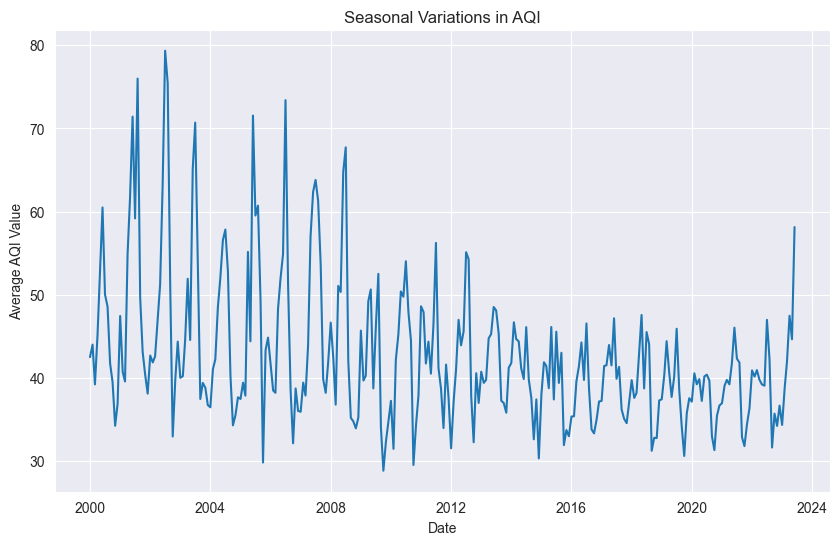

In [356]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(seasonal_data['Date'], seasonal_data[' AQI Value'])
plt.xlabel('Date')
plt.ylabel('Average AQI Value')
plt.title('Seasonal Variations in AQI')
plt.show()

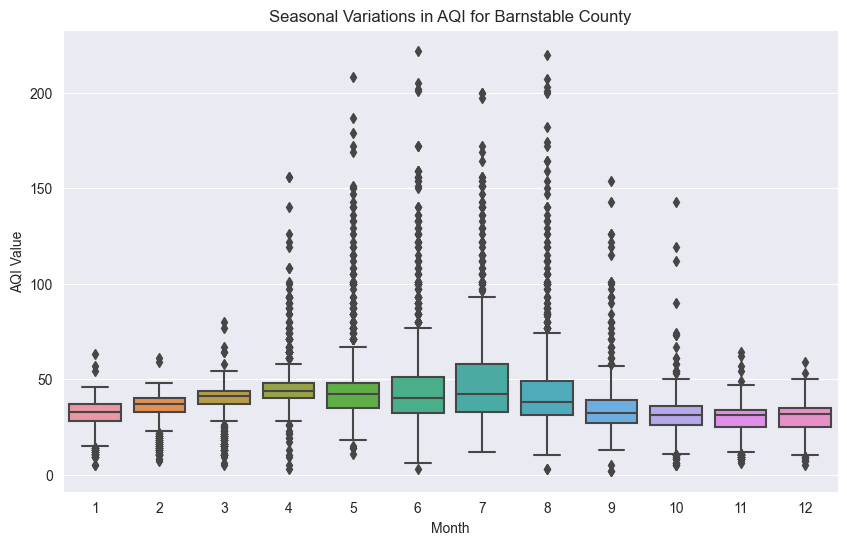

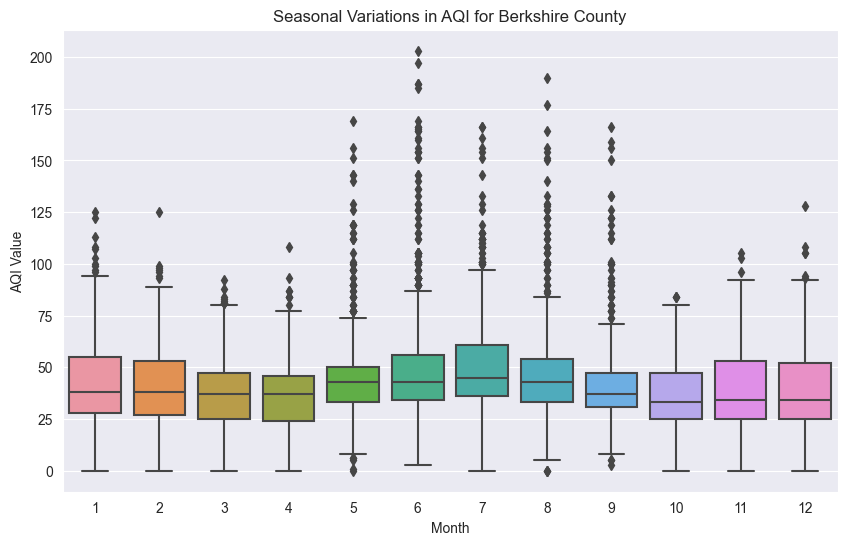

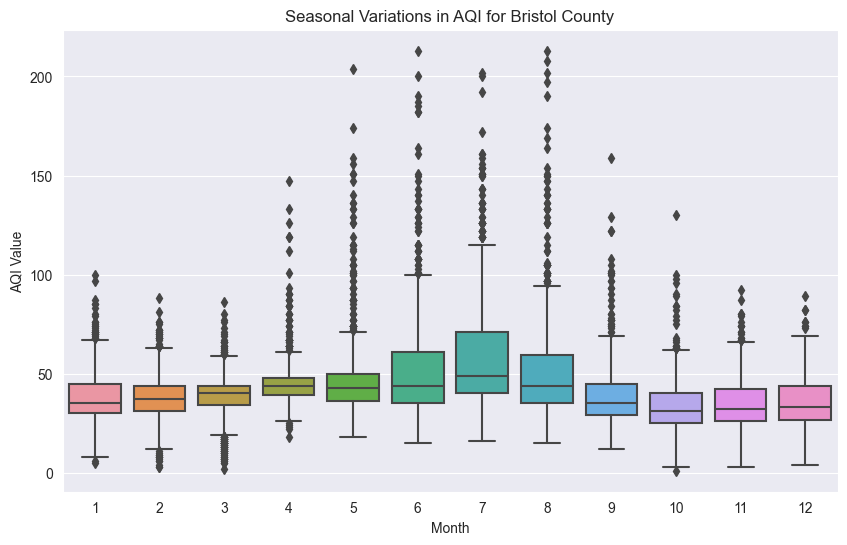

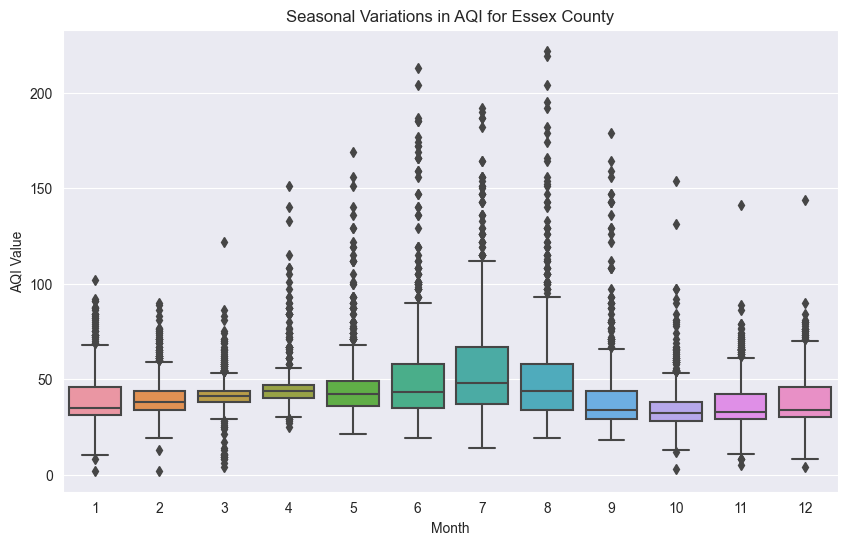

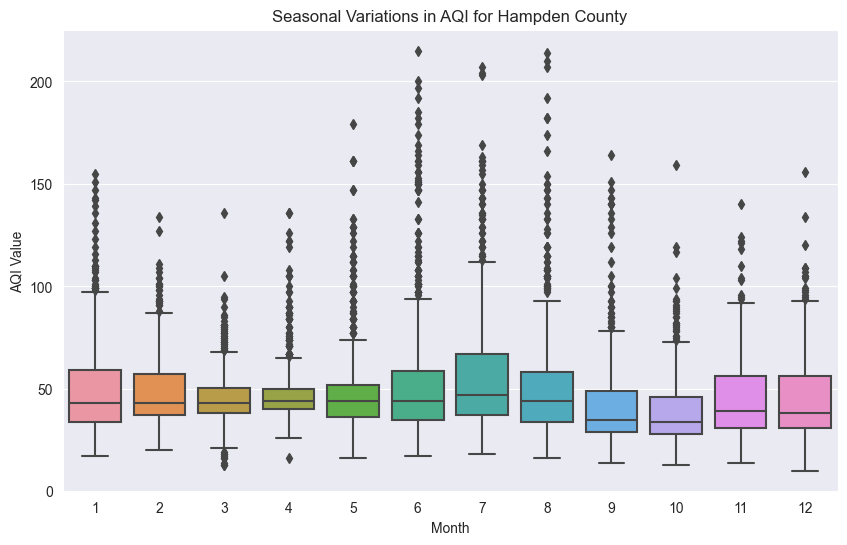

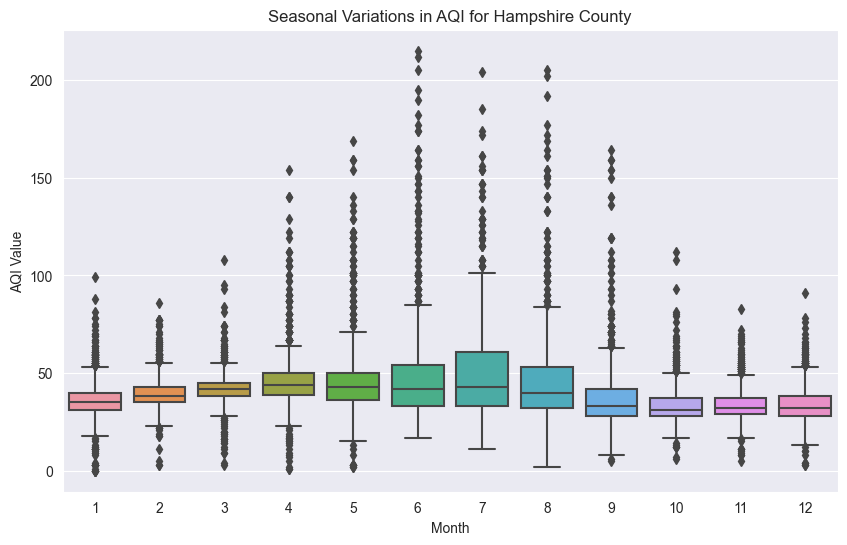

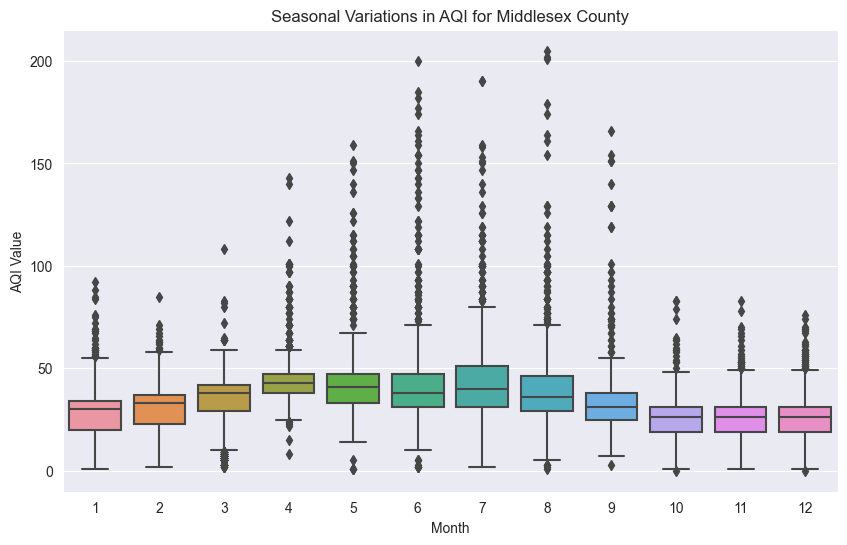

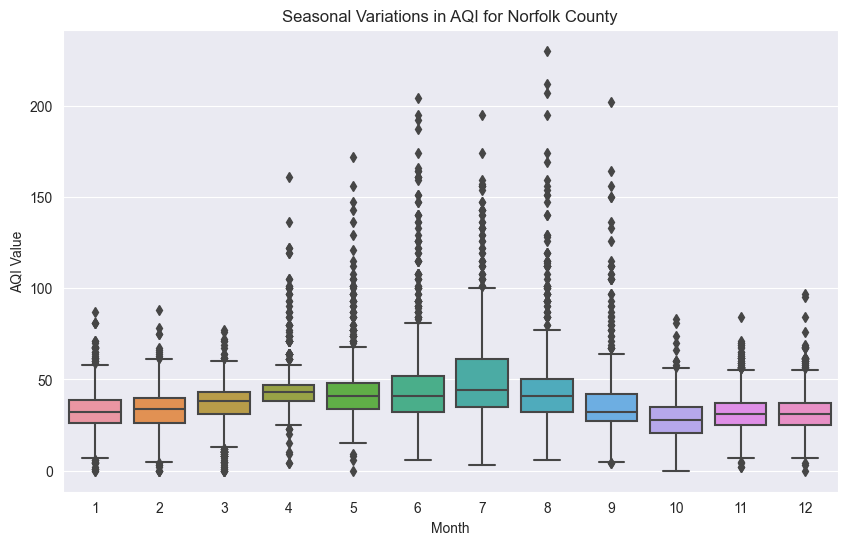

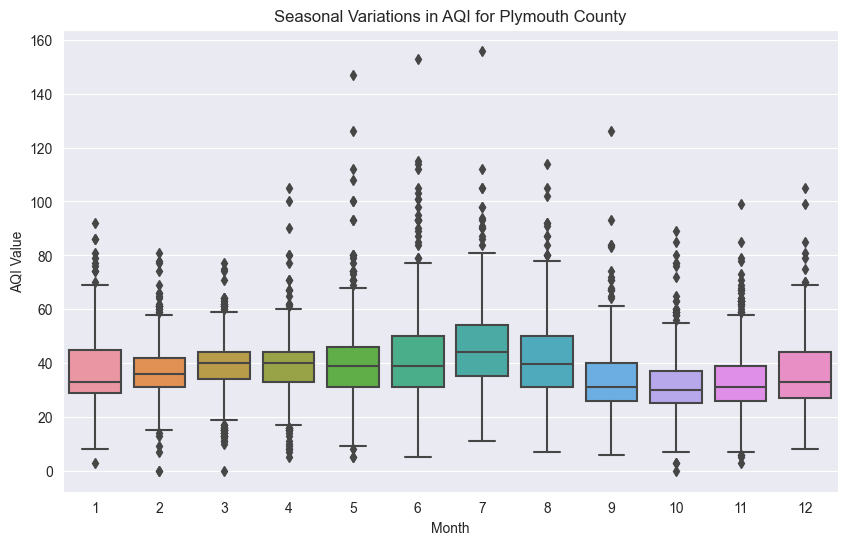

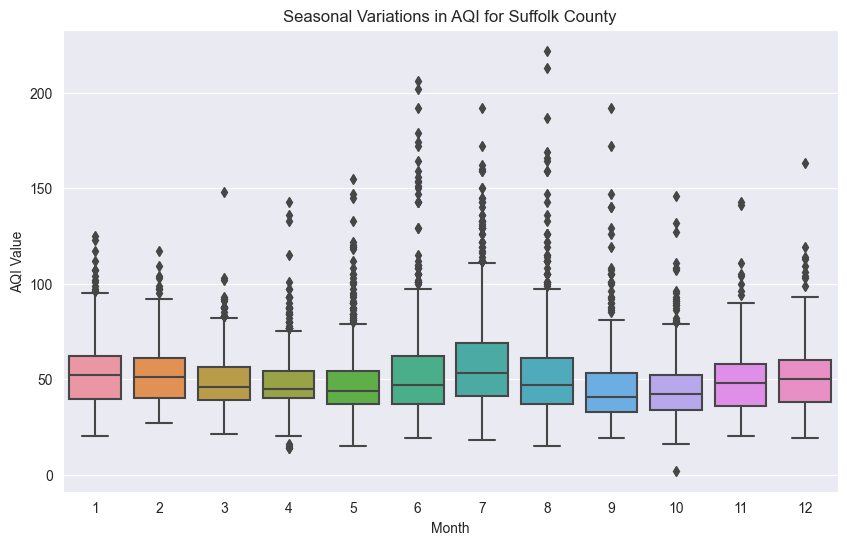

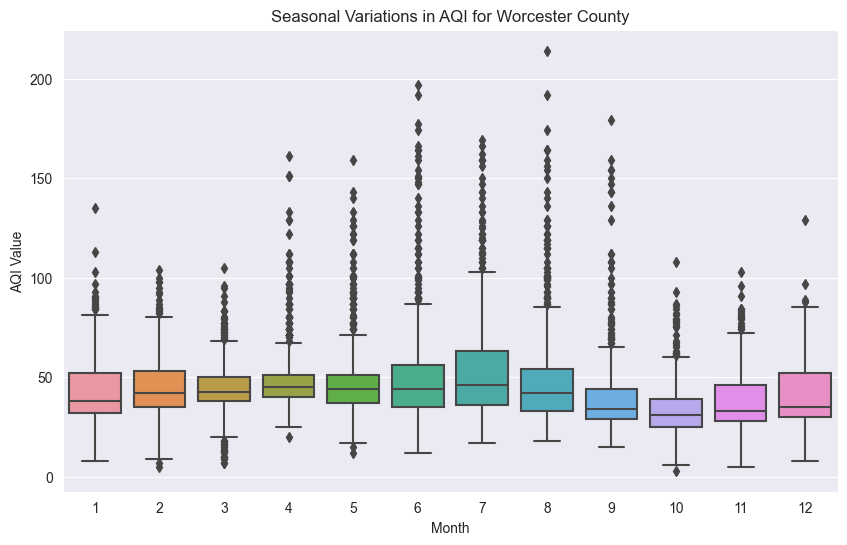

In [357]:
counties = aqi_df['County Name'].unique()

for county in counties:
    county_data = aqi_df[aqi_df['County Name'] == county]
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Month', y=' AQI Value', data=county_data)
    plt.xlabel('Month')
    plt.ylabel('AQI Value')
    plt.title('Seasonal Variations in AQI for ' + county)
    plt.show()


Seasonal Variation: The mean AQI tends to be higher in the summer months (June, July, August) for most counties. This could be due to increased sunlight and heat contributing to the formation of certain pollutants like ozone.

In [358]:
monthly_stats_all = aqi_df.groupby('Month')[' AQI Value'].describe()
print(monthly_stats_all)

        count       mean        std  min   25%   50%   75%    max
Month                                                            
1      7185.0  39.572999  17.204246  0.0  30.0  35.0  48.0  155.0
2      6619.0  40.145943  15.390981  0.0  33.0  38.0  47.0  134.0
3      7349.0  40.656280  13.380440  0.0  36.0  41.0  45.0  148.0
4      7429.0  45.401265  15.231956  0.0  38.0  44.0  49.0  161.0
5      7769.0  46.389625  20.267265  0.0  35.0  42.0  50.0  208.0
6      7402.0  50.654283  28.555704  2.0  34.0  42.0  56.0  222.0
7      7456.0  53.691792  27.591617  0.0  36.0  45.0  63.0  207.0
8      7481.0  48.810186  26.622802  0.0  33.0  42.0  54.0  230.0
9      7231.0  39.070530  19.363024  2.0  28.0  34.0  44.0  202.0
10     6970.0  33.864132  14.643740  0.0  26.0  31.0  40.0  159.0
11     6721.0  36.388633  15.796204  0.0  27.0  32.0  44.0  143.0
12     6927.0  37.313989  16.238726  0.0  28.0  33.0  45.0  163.0


In [359]:
monthly_stats_by_county = aqi_df.groupby(['County Name', 'Month'])[' AQI Value'].describe()
print(monthly_stats_by_county)
monthly_stats_by_county.to_csv('monthly_stats_by_county_boxplots.csv')

                         count       mean        std   min   25%   50%   75%   
County Name       Month                                                        
Barnstable County 1      466.0  31.066524   8.353602   5.0  28.0  33.0  37.0  \
                  2      434.0  34.041475   9.358309   7.0  33.0  37.0  40.0   
                  3      554.0  38.391697   9.382952   5.0  37.0  41.0  44.0   
                  4      695.0  46.427338  15.067862   3.0  40.0  44.0  48.0   
                  5      712.0  47.632022  24.207715  11.0  35.0  42.0  48.0   
...                        ...        ...        ...   ...   ...   ...   ...   
Worcester County  8      713.0  48.784011  25.340788  18.0  33.0  42.0  54.0   
                  9      690.0  39.860870  20.524849  15.0  29.0  34.0  44.0   
                  10     693.0  33.454545  13.751081   3.0  25.0  31.0  39.0   
                  11     670.0  37.601493  15.393717   5.0  28.0  33.0  46.0   
                  12     689.0  39.84905